In [ ]:
!pip install autocorrect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622363 sha256=cbf4f1e8bf5b87baab90874a69979b1c67bf20a09ba316d94f7d48f9a19d5935
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from difflib import get_close_matches
from autocorrect import Speller

# Descargar recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Configuración de la corrección ortográfica
corrector = Speller(lang='es')

# Preguntas y respuestas predefinidas
preguntas_respuestas = {
    "Plazo de garantía": {
        "preguntas": ["garantía", "duración", "periodo", "plazo de garantía", "duración de la garantía", "tiempo de garantía"],
        "respuesta": "Te confirmo que nuestro periodo de garantía es de 12 meses, aunque ¡estamos seguros de que el resultado será muy satisfactorio!"
    },
    "Plazo de puesta en marcha del servicio": {
        "preguntas": ["puesta en marcha", "arranque", "arranca", "inicio", "comienzo", "empieza" , "inicio del servicio", "tiempo para empezar el servicio"],
        "respuesta": "Nuestro servicio estará operativo en un plazo de 6 meses."
    },
    "Precio del servicio": {
        "preguntas": ["precio", "prezio", "valor", "tarifa", "costar", "costo", "cuánto cuesta", "dinero", "precio del servicio",
                      "precio del plan", "cuánto es el precio", "tarifas", "costo del plan", "valor del plan",
                      "cuánto es", "cuánto vale", "valor de los servicios", "costo del servicio", "precio de los servicios"],
        "respuesta": "El precio mensual de nuestro servicio es de 30€."
    },
    "Servicios ofrecidos": {
        "preguntas": ["servicio", "servicios", "qué ofrecen", "qué servicios ofrecen", "que me ofrecen",
                      "qué hacen", "qué servicio ofrecen", "qué puedo obtener", "qué proporcionan",
                      "qué me van a dar", "qué tienen", "qué productos ofrecen", "qué hacen ustedes"],
        "respuesta": "Ofrecemos una amplia gama de servicios. ¿Hay algo en particular en lo que estés interesado?"
    },
    "Experiencia de la empresa": {
        "preguntas": ["experiencia", "tiempo en el mercado", "años en el mercado", "años de experiencia",
                      "cuánto tiempo llevan", "cuántos años de experiencia tienen", "cuántos años llevan",
                      "cuánto tiempo han estado", "historial", "experiencia de la empresa",
                      "cuántos años de experiencia tienen en el mercado"],
        "respuesta": "Tenemos más de 25 años de experiencia en el mercado."
    },
    "Solicitud de hablar con un agente": {
        "preguntas": ["hablar con un agente", "agente humano", "ayuda personalizada", "atención personalizada"],
        "respuesta": "Lo siento, parece que necesitas ayuda personalizada. ¿Te gustaría hablar con un agente humano?"
    }
}

# Función para procesar la consulta del usuario
def procesar_consulta(consulta):
    # Corregir ortografía de la consulta
    consulta_corregida = corrector(consulta)

    # Tokenización y eliminación de stopwords
    lematizador = WordNetLemmatizer()
    tokens = word_tokenize(consulta_corregida.lower())
    print(tokens)
    tokens_filtrados = [lematizador.lemmatize(token) for token in tokens if token.isalnum() and token not in stopwords.words('spanish')]

    # Verificar si la consulta menciona directamente la palabra "precio" o una variación
    for token in tokens_filtrados:
        if token == "precio" or token.startswith("prezio"):
            return preguntas_respuestas["Precio del servicio"]["respuesta"]

    # Coincidencia exacta con preguntas predefinidas
    for pregunta, datos in preguntas_respuestas.items():
        if any(token in datos["preguntas"] for token in tokens_filtrados):
            return datos["respuesta"]

    # Coincidencia aproximada con preguntas predefinidas utilizando distancia de Levenshtein
    for pregunta, datos in preguntas_respuestas.items():
        for palabra_clave in datos["preguntas"]:
            coincidencias = get_close_matches(palabra_clave.lower(), tokens_filtrados)
            if coincidencias:
                return datos["respuesta"]

    # Verificar si el usuario solicita hablar con un agente
    if any(token in ["agente", "humano"] for token in tokens_filtrados):
        return preguntas_respuestas["Solicitud de hablar con un agente"]["respuesta"]

    # Si no hay coincidencias, sugerir hablar con un agente humano
    return "Lo siento, parece que necesitas ayuda personalizada. ¿Te gustaría hablar con un agente humano?"

# Interfaz básica de línea de comandos para el chatbot
print("¡Bienvenido al chatbot de nuestra empresa!")
print("Puedes realizar consultas sobre nuestros servicios.")

while True:
    entrada = input("Tú: ")
    if entrada.lower() == 'salir':
        break
    respuesta = procesar_consulta(entrada)
    print("Chatbot: " + respuesta)
    if "hablar con un agente" in respuesta.lower():
        print("Chatbot: Entendido. Te conectaré con un agente humano.")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


¡Bienvenido al chatbot de nuestra empresa!
Puedes realizar consultas sobre nuestros servicios.
Tú: que serbizio tienen
['que', 'servizio', 'tienen']
Chatbot: Ofrecemos una amplia gama de servicios. ¿Hay algo en particular en lo que estés interesado?
Tú: cual es la gurantia
['cual', 'es', 'la', 'aurantia']
Chatbot: Te confirmo que nuestro periodo de garantía es de 12 meses, aunque ¡estamos seguros de que el resultado será muy satisfactorio!
Tú: cuando comienca
['cuando', 'comienza']
Chatbot: Nuestro servicio estará operativo en un plazo de 6 meses.
Tú: que esperienza tienen
['que', 'esperanza', 'tienen']
Chatbot: Nuestro servicio estará operativo en un plazo de 6 meses.
Tú: que esperienza tienen
['que', 'esperanza', 'tienen']
Chatbot: Nuestro servicio estará operativo en un plazo de 6 meses.
Tú: que esperienzia tienen
['que', 'experiencia', 'tienen']
Chatbot: Tenemos más de 25 años de experiencia en el mercado.
Tú: quisiera hablar con un humano
['quisiera', 'hablar', 'con', 'un', 'human

In [ ]:
#version ia---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
!python -m spacy download es_core_news_sm
!pip install pyspellchecker


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 22.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 14.8 MB/s eta 0:00:00


In [ ]:
import spacy
from difflib import get_close_matches
from autocorrect import Speller
from textblob import TextBlob  # Importamos la biblioteca TextBlob
from spellchecker import SpellChecker

spell = SpellChecker(language='es')

# Descargar el modelo de spaCy en español
# python -m spacy download es_core_news_sm
nlp = spacy.load("es_core_news_sm")

# Preguntas y respuestas predefinidas
preguntas_respuestas = {
    "Plazo de garantía": {
        "preguntas": ["garantía", "duración", "periodo", "plazo de garantía", "duración de la garantía", "tiempo de garantía"],
        "respuesta": "Te confirmo que nuestro periodo de garantía es de 12 meses, aunque ¡estamos seguros de que el resultado será muy satisfactorio!"
    },
    "Plazo de puesta en marcha del servicio": {
        "preguntas": ["puesta en marcha", "arranque", "arranca", "inicio", "comienzo", "empieza" , "inicio del servicio", "tiempo para empezar el servicio"],
        "respuesta": "Nuestro servicio estará operativo en un plazo de 6 meses."
    },
    "Precio del servicio": {
        "preguntas": ["precio", "prezio", "valor", "tarifa", "costar", "costo", "cuánto cuesta", "dinero", "precio del servicio",
                      "precio del plan", "cuánto es el precio", "tarifas", "costo del plan", "valor del plan",
                      "cuánto es", "cuánto vale", "valor de los servicios", "costo del servicio", "precio de los servicios"],
        "respuesta": "El precio mensual de nuestro servicio es de 30€."
    },
    "Servicios ofrecidos": {
        "preguntas": ["servicio", "servicios", "qué ofrecen", "qué servicios ofrecen", "que me ofrecen",
                      "qué hacen", "qué servicio ofrecen", "qué puedo obtener", "qué proporcionan",
                      "qué me van a dar", "qué tienen", "qué productos ofrecen", "qué hacen ustedes"],
        "respuesta": "Ofrecemos una amplia gama de servicios. ¿Hay algo en particular en lo que estés interesado?"
    },
    "Experiencia de la empresa": {
        "preguntas": ["experiencia", "tiempo en el mercado", "años en el mercado", "años de experiencia",
                      "cuánto tiempo llevan", "cuántos años de experiencia tienen", "cuántos años llevan",
                      "cuánto tiempo han estado", "historial", "experiencia de la empresa",
                      "cuántos años de experiencia tienen en el mercado"],
        "respuesta": "Tenemos más de 25 años de experiencia en el mercado."
    },
    "Solicitud de hablar con un agente": {
        "preguntas": ["hablar con un agente", "agente humano", "ayuda personalizada", "atención personalizada"],
        "respuesta": "Lo siento, parece que necesitas ayuda personalizada. ¿Te gustaría hablar con un agente humano?"
    }
}

# Función para procesar la consulta del usuario
def procesar_consulta(consulta):
    # Corregir ortografía de la consulta utilizando pyspellchecker
    palabras = consulta.split()  # Dividir la consulta en palabras
    consulta_corregida = [spell.correction(palabra) for palabra in palabras]
    consulta_corregida = ' '.join(consulta_corregida)  # Unir las palabras corregidas en una cadena

    # Tokenización y eliminación de stopwords con spaCy
    doc = nlp(consulta_corregida)
    print(doc)
    tokens_filtrados = [token.text.lower() for token in doc if token.text.isalnum() and not token.is_stop]

    # Coincidencia exacta con preguntas predefinidas
    for pregunta, datos in preguntas_respuestas.items():
        if any(token in datos["preguntas"] for token in tokens_filtrados):
            return datos["respuesta"]

    # Coincidencia aproximada con preguntas predefinidas utilizando distancia de Levenshtein
    for pregunta, datos in preguntas_respuestas.items():
        for palabra_clave in datos["preguntas"]:
            coincidencias = get_close_matches(palabra_clave.lower(), tokens_filtrados)
            if coincidencias:
                return datos["respuesta"]

    # Verificar si el usuario solicita hablar con un agente
    if any(token in ["agente", "humano"] for token in tokens_filtrados):
        return preguntas_respuestas["Solicitud de hablar con un agente"]["respuesta"]

    # Si no hay coincidencias, sugerir hablar con un agente humano
    return "Lo siento, parece que necesitas ayuda personalizada. ¿Te gustaría hablar con un agente humano?"

# Interfaz básica de línea de comandos para el chatbot
print("¡Bienvenido al chatbot de nuestra empresa!")
print("Puedes realizar consultas sobre nuestros servicios.")

while True:
    entrada = input("Tú: ")
    if entrada.lower() == 'salir':
        break
    respuesta = procesar_consulta(entrada)
    print("Chatbot: " + respuesta)
    if "hablar con un agente" in respuesta.lower():
        print("Chatbot: Entendido. Te conectaré con un agente humano.")



¡Bienvenido al chatbot de nuestra empresa!
Puedes realizar consultas sobre nuestros servicios.
Tú: que serbizio ofrezen
que servicio ofrecer
Chatbot: Ofrecemos una amplia gama de servicios. ¿Hay algo en particular en lo que estés interesado?
Tú: cuanfo dura la gurantia
cuando dura la garantía
Chatbot: Te confirmo que nuestro periodo de garantía es de 12 meses, aunque ¡estamos seguros de que el resultado será muy satisfactorio!
Tú: que esperienzia tienen
que experiencia tener
Chatbot: Tenemos más de 25 años de experiencia en el mercado.
Tú: cuando zomienza
cuando comienzo
Chatbot: Nuestro servicio estará operativo en un plazo de 6 meses.
Tú: ajente umano
agente mano
Chatbot: Lo siento, parece que necesitas ayuda personalizada. ¿Te gustaría hablar con un agente humano?
Chatbot: Entendido. Te conectaré con un agente humano.
Tú: salir


In [ ]:
import pandas as pd

preguntas = [
    "¿De cuanto plazo dispongo en la garantia?",
    "¿Qué duración tiene la garantía?",
    "¿Por cuánto tiempo está garantizado el producto?",
    "¿Cuánto tiempo dura la garantía del producto?",
    "¿Cuál es la extensión de la garantía?",
    "¿Por cuántos meses está cubierto el producto por garantía?",
    "¿Hasta cuándo está protegida la compra por garantía?",
    "¿Durante cuánto tiempo se encuentra vigente la garantía?",
    "¿Cuánto tiempo tengo para hacer uso de la garantía?",
    "¿Cuál es el periodo de cobertura de la garantía?",
    "¿Cuánto tiempo tengo derecho a la garantía?",
    "¿Cuál es el plazo de garantía para este producto?",
    "¿Por cuánto tiempo está respaldado el producto por la garantía?",
    "¿Cuál es la duración de la cobertura de la garantía?",
    "¿Durante cuántos meses puedo hacer uso de la garantía?",
    "¿Hasta qué fecha está válida la garantía del artículo?",
    "¿Cuánto tiempo está garantizada la compra del producto?",
    "¿Por cuánto tiempo está protegida la compra por la garantía?",
    "¿Cuánto tiempo está activa la garantía del producto?",
    "¿Cuál es el período de garantía ofrecido para este artículo?",
    "¿Cuánto tiempo tengo para reclamar bajo la garantía del producto?",
    "¿Cuál es el plazo máximo de garantía disponible?",
    "¿Por cuánto tiempo se extiende la garantía?",
    "Durante qué periodo está garantizado el producto?",
    "¿Cuál es la duración máxima de la garantía del producto?",
    "¿Cuánto tiempo abarca la garantía?",
    "¿Por cuántos meses se cubre el producto con garantía?",
    "¿Hasta cuándo puedo contar con la protección de la garantía para mi compra?",
    "¿Cuánto tiempo permanece válida la garantía?",
    "¿Cuál es el lapso para hacer uso de la garantía?",
    "¿Por cuánto tiempo se extiende la cobertura de la garantía?",
    "¿Cuánto tiempo tengo derecho a la garantía del producto?",
    "¿Cuál es el período de garantía para este artículo en particular?",
    "¿Por cuánto tiempo puedo hacer reclamos bajo la garantía?",
    "¿Cuánto dura la garantía del producto desde la fecha de compra?",
    "¿Hasta cuándo puedo solicitar la garantía?",
    "¿Por cuánto tiempo se mantiene activa la garantía?",
    "¿Cuál es el límite de tiempo para hacer uso de la garantía?",
    "¿Por cuántos meses está protegida la compra por garantía?",
    "¿Cuánto tiempo está garantizada la satisfacción del producto?",
    "¿Hasta qué fecha puedo hacer uso de la garantía del producto?",

    "¿Cuando comienza el servicio?",
    "¿Cuándo empieza a estar disponible el servicio?",
    "¿En qué fecha inicia el servicio?",
    "¿Cuándo estará listo el servicio para su uso?",
    "¿A partir de cuándo puedo utilizar el servicio?",
    "¿Cuándo estará activo el servicio?",
    "¿Cuándo puedo empezar a disfrutar del servicio?",
    "¿Desde cuándo está operativo el servicio?",
    "¿Cuándo comienza la prestación del servicio?",
    "¿Cuál es la fecha de inicio del servicio?",
    "¿A partir de cuándo puedo acceder al servicio?",
    "¿Cuándo se activa el servicio?",
    "¿A partir de cuándo estará disponible el servicio?",
    "¿Cuándo estará listo para comenzar el servicio?",
    "¿Desde qué día podré empezar a utilizar el servicio?",
    "¿Cuándo empezará a funcionar el servicio?",
    "¿Cuándo estará disponible para su uso el servicio?",
    "¿Cuándo estará operativa la prestación del servicio?",
    "¿Cuál es la fecha de inicio de la disponibilidad del servicio?",
    "¿A partir de qué fecha puedo disfrutar del servicio?",
    "¿Cuándo puedo empezar a acceder al servicio?",
    "¿Cuándo se inicia el servicio?",
    "¿Cuándo estará disponible el servicio para su uso?",
    "¿En qué fecha comenzará el servicio?",
    "¿A partir de cuándo estará listo el servicio para ser utilizado?",
    "¿Desde cuándo puedo empezar a utilizar el servicio?",
    "¿Cuándo se activará el servicio?",
    "¿A partir de cuándo puedo empezar a disfrutar del servicio?",
    "¿Desde cuándo está en funcionamiento el servicio?",
    "¿Cuándo se inicia la prestación del servicio?",
    "¿Cuál es la fecha de inicio del servicio?",
    "¿Desde cuándo puedo acceder al servicio?",
    "¿Cuándo se pondrá en marcha el servicio?",
    "¿A partir de cuándo estará disponible el servicio para su uso?",
    "¿Cuándo estará listo para comenzar el servicio?",
    "¿Desde qué día podré empezar a utilizar el servicio?",
    "¿Cuándo comenzará a funcionar el servicio?",
    "¿Cuándo estará disponible el servicio para ser utilizado?",
    "¿Cuándo estará operativa la prestación del servicio?",
    "¿Cuál es la fecha de inicio de la disponibilidad del servicio?",
    "¿A partir de qué fecha podré disfrutar del servicio?",

    "¿Cuántos años de experiencia tienen en el mercado?",
    "¿Cuánto tiempo llevan en el mercado?",
    "¿Cuántos años llevan operando?",
    "¿Cuál es su trayectoria en el mercado?",
    "¿Desde cuándo están en el mercado?",
    "¿Cuántos años tienen de experiencia?",
    "¿Cuánto tiempo ha estado la empresa en funcionamiento?",
    "¿Cuántos años tienen en la industria?",
    "¿Desde cuándo están activos en el mercado?",
    "¿Cuánto tiempo llevan ofreciendo sus servicios?",
    "¿Cuál es la antigüedad de la empresa en el mercado?",
    "¿Cuál es su experiencia en el sector?",
    "¿Desde hace cuánto tiempo han estado operando en la industria?",
    "¿Cuántos años llevan en el ámbito comercial?",
    "¿Qué historial tienen en el mercado?",
    "¿Desde cuándo han estado presentes en la industria?",
    "¿Cuál es su tiempo de actividad en el mercado?",
    "¿Qué tiempo llevan ofreciendo sus servicios al público?",
    "¿Desde cuándo han estado activos en el mercado?",
    "¿Cuántos años acumulan en su trayectoria?",
    "¿Qué experiencia poseen en el campo empresarial?",
    "¿Cuánta experiencia tienen en su campo?",
    "¿Hace cuánto tiempo operan en su sector?",
    "¿Cuántos años han estado activos en la industria?",
    "¿Cuál es su trayectoria en el ámbito empresarial?",
    "¿Desde cuándo ofrecen sus servicios al público?",
    "¿Cuánto tiempo llevan siendo parte del mercado?",
    "¿Qué tiempo ha pasado desde que iniciaron sus operaciones?",
    "¿Cuántos años han acumulado en el mercado?",
    "¿Qué historial empresarial han construido a lo largo de los años?",
    "¿Desde cuándo han estado involucrados en la industria?",
    "¿Cuál es la duración de su presencia en el mercado?",
    "¿Cuántos años llevan desempeñando su actividad comercial?",
    "¿Qué experiencia han adquirido en el ámbito empresarial?",
    "¿Cuál es la extensión de su participación en el mercado?",
    "¿Desde cuándo han estado ofreciendo sus servicios al público en general?",
    "¿Cuánto tiempo ha transcurrido desde que comenzaron sus operaciones?",
    "¿Cuántos años de experiencia acumulan en su campo?",
    "¿Qué tiempo llevan siendo parte de la industria?",
    "¿Desde cuándo forman parte del sector empresarial?",
    "¿Cuál es la duración de su actividad en el mercado?",

    "¿Cuánto me costaría la tarifa?",
    "¿Cuál sería el precio de la tarifa?",
    "¿Cuánto tendría que pagar por la tarifa?",
    "¿Cuál sería el costo de la tarifa?",
    "¿Cuánto me saldría la tarifa?",
    "¿A cuánto asciende el precio de la tarifa?",
    "¿Cuál sería el importe de la tarifa?",
    "¿Cuánto debería desembolsar por la tarifa?",
    "¿Cuánto me saldría en total la tarifa?",
    "¿Cuál sería el valor de la tarifa?",
    "¿Cuánto tendría que abonar por la tarifa?",
    "¿A cuánto asciende el gasto de la tarifa?",
    "¿Cuál sería el costo total de la tarifa?",
    "¿Cuánto me supondría la tarifa?",
    "¿Cuál sería el precio total de la tarifa?",
    "¿Cuánto tendría que invertir en la tarifa?",
    "¿A cuánto asciende el importe de la tarifa?",
    "¿Cuánto debería pagar en total por la tarifa?",
    "¿Cuál sería el desembolso por la tarifa?",
    "¿Cuánto me costaría en su totalidad la tarifa?",
    "¿A cuánto asciende el costo de la tarifa?",
    "¿Cuánto sería el desembolso total por la tarifa?",
    "¿Cuál sería el importe total de la tarifa?",
    "¿Cuánto debería abonar en su totalidad por la tarifa?",
    "¿Cuál sería el precio final de la tarifa?",
    "¿Cuánto me supondría en total la tarifa?",
    "¿A cuánto ascendería el gasto total de la tarifa?",
    "¿Cuánto tendría que desembolsar en total por la tarifa?",
    "¿Cuál sería el valor total de la tarifa?",
    "¿Cuánto debería pagar en conjunto por la tarifa?",
    "¿A cuánto ascendería el costo total de la tarifa?",
    "¿Cuál sería el importe final de la tarifa?",
    "¿Cuánto me costaría en conjunto la tarifa?",
    "¿A cuánto ascendería el precio total de la tarifa?",
    "¿Cuál sería el gasto total por la tarifa?",
    "¿Cuánto tendría que abonar en su totalidad por la tarifa?",
    "¿A cuánto ascendería el desembolso total por la tarifa?",
    "¿Cuál sería el valor final de la tarifa?",
    "¿Cuánto me saldría en su totalidad la tarifa?",
    "¿A cuánto ascendería el importe total de la tarifa?",
    "¿Cuál sería el costo total por la tarifa?"
]

respuestas = [
    "Te confirmo que nuestro periodo de garantía es de 12 meses, aunque ¡estamos seguros de que el resultado será muy satisfactorio!",
    "Nuestra garantía estándar cubre el producto durante un período de 12 meses desde la fecha de compra.",
    "Estamos comprometidos a ofrecerte una garantía completa de un año para todos nuestros productos.",
    "Puedes confiar en nuestra política de garantía, que garantiza la calidad de nuestros productos durante 12 meses.",
    "La garantía de nuestros productos te brinda tranquilidad durante un año completo a partir de la fecha de adquisición.",
    "Nuestro compromiso es garantizar la calidad de nuestros productos mediante una garantía de 12 meses.",
    "Todos nuestros productos están respaldados por una garantía estándar de un año para tu completa satisfacción.",
    "Te ofrecemos una garantía integral de 12 meses para que compres con total confianza.",
    "La garantía de 12 meses forma parte de nuestro compromiso de brindarte productos de alta calidad.",
    "Con nuestra garantía de un año, puedes estar seguro de la durabilidad y calidad de nuestros productos.",
    "Estamos aquí para respaldar nuestra calidad con una garantía completa de 12 meses desde la compra.",
    "Nuestro compromiso es ofrecerte una garantía completa de 12 meses para asegurar tu satisfacción total.",
    "Puedes contar con nuestra garantía estándar de un año que respalda la calidad de nuestros productos.",
    "Estamos dedicados a proporcionarte una garantía sólida de 12 meses para todos nuestros productos.",
    "Garantizamos la calidad de nuestros productos con una política de garantía de 12 meses desde la fecha de compra.",
    "La garantía de 12 meses es parte de nuestro compromiso de ofrecerte productos confiables y duraderos.",
    "Todos nuestros productos están respaldados por una garantía sólida de un año para tu tranquilidad.",
    "Te ofrecemos una garantía completa de 12 meses para que puedas comprar con confianza.",
    "Nuestra garantía de 12 meses demuestra nuestro compromiso con la calidad y la satisfacción del cliente.",
    "Con nuestra garantía estándar de un año, te garantizamos la durabilidad y el rendimiento de nuestros productos.",
    "Respaldamos la calidad de nuestros productos con una garantía integral de 12 meses desde la fecha de adquisición.",
    "Queremos confirmarte que nuestro periodo de garantía abarca 12 meses, ¡y estamos seguros de que quedarás muy satisfecho con el resultado!",
    "La cobertura de nuestra garantía estándar se extiende por 12 meses desde la fecha de compra del producto.",
    "Nos comprometemos a brindarte una garantía completa de un año para todos nuestros productos.",
    "Puedes tener total confianza en nuestra política de garantía, la cual asegura la calidad de nuestros productos durante 12 meses.",
    "La garantía de nuestros productos te ofrece tranquilidad durante un año completo a partir de la fecha de adquisición.",
    "Nuestro compromiso es asegurar la calidad de nuestros productos mediante una garantía de 12 meses.",
    "Todos nuestros productos cuentan con una garantía estándar de un año para tu total satisfacción.",
    "Te proporcionamos una garantía integral de 12 meses para que puedas realizar tu compra con total confianza.",
    "La garantía de 12 meses forma parte de nuestra promesa de ofrecerte productos de alta calidad.",
    "Con nuestra garantía de un año, puedes estar seguro de la durabilidad y calidad de nuestros productos.",
    "Estamos aquí para respaldar la calidad de nuestros productos con una garantía completa de 12 meses desde la compra.",
    "Nuestro compromiso es ofrecerte una garantía completa de 12 meses para asegurar tu total satisfacción.",
    "Puedes confiar en nuestra garantía estándar de un año, la cual respalda la calidad de nuestros productos.",
    "Nos dedicamos a proporcionarte una garantía sólida de 12 meses para todos nuestros productos.",
    "Aseguramos la calidad de nuestros productos con una política de garantía de 12 meses desde la fecha de compra.",
    "La garantía de 12 meses es una muestra de nuestro compromiso con la calidad y la satisfacción del cliente.",
    "Todos nuestros productos vienen respaldados por una garantía sólida de un año para brindarte tranquilidad.",
    "Te ofrecemos una garantía completa de 12 meses para que puedas realizar tu compra con confianza.",
    "Nuestra garantía de 12 meses refleja nuestro compromiso con la calidad y la satisfacción del cliente.",
    "Con nuestra garantía estándar de un año, te aseguramos la durabilidad y rendimiento de nuestros productos.",


    "Nuestro servicio estará operativo en un plazo de 6 meses.",
    "Estamos trabajando arduamente para lanzar nuestro servicio en los próximos 6 meses.",
    "Dentro de medio año, nuestro servicio estará completamente operativo y listo para su uso.",
    "En un lapso de 6 meses, podrás disfrutar de todos los beneficios de nuestro servicio.",
    "Estamos en proceso de desarrollo y nuestro servicio estará disponible en 6 meses.",
    "Marca tu calendario, porque en 6 meses nuestro servicio estará en pleno funcionamiento.",
    "¡Prepárate para disfrutar de nuestro servicio en tan solo 6 meses!",
    "Dentro de un periodo de 6 meses, nuestro servicio estará listo para ser lanzado.",
    "Estamos en la fase final de desarrollo y en 6 meses podrás aprovechar nuestro servicio.",
    "En un lapso de medio año, podrás experimentar todo lo que nuestro servicio tiene para ofrecer.",
    "La espera valdrá la pena: en 6 meses, nuestro servicio estará disponible para todos.",
    "Nuestro servicio estará disponible en aproximadamente 6 meses, así que mantente atento.",
    "Estamos programando el lanzamiento de nuestro servicio para dentro de unos 6 meses.",
    "En un plazo de 6 meses, podrás disfrutar de todas las funciones de nuestro servicio.",
    "En unos 6 meses, nuestro servicio estará listo para su lanzamiento oficial.",
    "Estamos en la etapa final de desarrollo y esperamos lanzar nuestro servicio en unos 6 meses.",
    "¡Solo tienes que esperar un poco más! Dentro de 6 meses, nuestro servicio estará disponible.",
    "Estamos planeando tener nuestro servicio completamente operativo en 6 meses.",
    "Marque su calendario: en unos 6 meses, nuestro servicio estará disponible para todos los usuarios.",
    "Nuestro servicio estará en funcionamiento en un plazo aproximado de 6 meses.",
    "¡El conteo regresivo ha comenzado! En 6 meses, nuestro servicio será una realidad para todos.",
    "Nuestro servicio estará en funcionamiento dentro de un plazo de 6 meses.",
    "Estamos dedicando esfuerzos para lanzar nuestro servicio en los próximos 6 meses.",
    "En medio año, nuestro servicio estará operativo y listo para su utilización.",
    "En un lapso de 6 meses, podrás disfrutar de todas las ventajas de nuestro servicio.",
    "Nos encontramos en proceso de desarrollo y nuestro servicio estará disponible en 6 meses.",
    "Marca tu calendario, porque en 6 meses nuestro servicio estará completamente funcional.",
    "Prepárate para disfrutar de nuestro servicio en tan solo 6 meses.",
    "Dentro de un periodo de 6 meses, nuestro servicio estará listo para ser lanzado.",
    "Estamos en la fase final de desarrollo y en 6 meses podrás comenzar a utilizar nuestro servicio.",
    "En un lapso de medio año, podrás experimentar todo lo que nuestro servicio tiene para ofrecerte.",
    "La espera valdrá la pena: en 6 meses, nuestro servicio estará disponible para todos.",
    "Nuestro servicio estará disponible en aproximadamente 6 meses, así que mantente atento.",
    "Estamos programando el lanzamiento de nuestro servicio para dentro de unos 6 meses.",
    "En un plazo de 6 meses, podrás aprovechar todas las funciones de nuestro servicio.",
    "En unos 6 meses, nuestro servicio estará listo para su lanzamiento oficial.",
    "Estamos en la etapa final de desarrollo y esperamos lanzar nuestro servicio en unos 6 meses.",
    "¡Solo tienes que esperar un poco más! Dentro de 6 meses, nuestro servicio estará disponible.",
    "Estamos planeando tener nuestro servicio completamente operativo en 6 meses.",
    "Marca tu calendario: en unos 6 meses, nuestro servicio estará disponible para todos los usuarios.",
    "Nuestro servicio estará en funcionamiento en un plazo aproximado de 6 meses. ¡El conteo regresivo ha comenzado!",

    "Tenemos más de 25 años de experiencia en el mercado.",
    "Nuestra experiencia en el mercado abarca más de dos décadas, brindándote confianza y calidad.",
    "Con más de un cuarto de siglo en el mercado, somos líderes en nuestro sector.",
    "Contamos con una trayectoria de más de 25 años, asegurando excelencia y profesionalismo.",
    "Desde hace más de dos décadas, hemos estado sirviendo a nuestros clientes con dedicación.",
    "Nuestra experiencia de más de 25 años nos posiciona como expertos en la industria.",
    "Con más de 25 años en el mercado, tenemos un sólido historial de éxito y satisfacción del cliente.",
    "Durante más de un cuarto de siglo, hemos estado comprometidos con la excelencia y la innovación.",
    "Con un legado de más de 25 años, hemos sido pioneros en el mercado desde nuestros inicios.",
    "Desde hace más de dos décadas, hemos sido reconocidos por nuestra experiencia y compromiso.",
    "Con más de 25 años en el mercado, hemos acumulado un conocimiento invaluable para satisfacer las necesidades de nuestros clientes.",
    "Contamos con más de 25 años de experiencia en el sector, brindando calidad y confianza.",
    "Nuestra experiencia en el mercado se extiende por más de dos décadas, garantizando profesionalismo.",
    "Con más de 25 años en la industria, somos referentes en nuestro ámbito de acción.",
    "Nos respaldan más de 25 años de trayectoria en el mercado, demostrando nuestro compromiso.",
    "Durante más de dos décadas, hemos sido líderes en el mercado, sirviendo a nuestros clientes con dedicación.",
    "Nuestros más de 25 años de experiencia nos posicionan como expertos en la industria.",
    "Con un historial de éxito de más de 25 años, hemos establecido estándares de calidad en el mercado.",
    "A lo largo de más de un cuarto de siglo, hemos mantenido un compromiso constante con la excelencia.",
    "Con una sólida experiencia de más de 25 años, hemos sido pioneros en nuestro sector desde el principio.",
    "Durante más de dos décadas, hemos sido reconocidos por nuestra experiencia y dedicación a nuestros clientes.",
    "Contamos con más de 25 años de experiencia en el mercado.",
    "Nuestra trayectoria en el mercado se extiende por más de dos décadas, ofreciendo confianza y calidad.",
    "Con más de un cuarto de siglo en el mercado, somos líderes en nuestro sector.",
    "Tenemos una experiencia de más de 25 años, garantizando excelencia y profesionalismo.",
    "Desde hace más de dos décadas, hemos estado comprometidos en servir a nuestros clientes con dedicación.",
    "Nuestra amplia experiencia de más de 25 años nos posiciona como expertos en la industria.",
    "Con más de 25 años en el mercado, tenemos un historial sólido de éxito y satisfacción del cliente.",
    "Durante más de un cuarto de siglo, hemos mantenido un compromiso constante con la excelencia y la innovación.",
    "Con un legado de más de 25 años, hemos sido pioneros en el mercado desde nuestros inicios.",
    "Desde hace más de dos décadas, hemos sido reconocidos por nuestra experiencia y compromiso.",
    "Con más de 25 años en el mercado, hemos acumulado un conocimiento invaluable para satisfacer las necesidades de nuestros clientes.",
    "Contamos con más de 25 años de experiencia en el sector, ofreciendo calidad y confianza.",
    "Nuestra experiencia en el mercado abarca más de dos décadas, garantizando profesionalismo.",
    "Con más de 25 años en la industria, somos referentes en nuestro ámbito de acción.",
    "Nos respaldan más de 25 años de trayectoria en el mercado, demostrando nuestro compromiso.",
    "Durante más de dos décadas, hemos sido líderes en el mercado, sirviendo a nuestros clientes con dedicación.",
    "Nuestros más de 25 años de experiencia nos consolidan como expertos en la industria.",
    "Con un historial de éxito de más de 25 años, hemos establecido estándares de calidad en el mercado.",
    "A lo largo de más de un cuarto de siglo, hemos mantenido un compromiso constante con la excelencia.",
    "Con una sólida experiencia de más de 25 años, hemos sido pioneros en nuestro sector desde el principio.",

    "El precio mensual de nuestro servicio es de 30€.",
    "Nuestra tarifa mensual es de 30 euros, ofreciendo un excelente valor por tu dinero.",
    "Por solo 30 euros al mes, puedes disfrutar de nuestro servicio sin preocupaciones.",
    "El costo mensual de nuestro servicio asciende a 30 euros, una opción económica y accesible.",
    "Por una tarifa mensual de 30 euros, obtienes acceso completo a nuestro servicio de alta calidad.",
    "Con solo 30 euros al mes, puedes aprovechar todas las ventajas de nuestro servicio premium.",
    "A un precio mensual de 30 euros, nuestro servicio se adapta perfectamente a tu presupuesto.",
    "Por tan solo 30 euros al mes, tendrás acceso ilimitado a todas las funciones de nuestro servicio.",
    "Nuestra tarifa mensual de 30 euros garantiza un servicio confiable y asequible para todos.",
    "Por un precio mensual de 30 euros, te ofrecemos un servicio de primera clase a un precio justo.",
    "Con un costo de 30 euros al mes, nuestro servicio se destaca por su excelente relación calidad-precio.",
    "Ofrecemos nuestro servicio a un precio mensual de 30 euros, brindando un excelente valor por tu inversión.",
    "Por tan solo 30 euros al mes, puedes acceder a nuestra oferta de servicios, garantizando un excelente retorno de tu inversión.",
    "Nuestro servicio está disponible por una tarifa mensual de 30 euros, asegurando un retorno significativo por tu gasto.",
    "A un costo de 30 euros al mes, nuestro servicio proporciona una solución asequible y de alta calidad para tus necesidades.",
    "Por solo 30 euros al mes, puedes obtener acceso completo a nuestro servicio, ofreciendo un excelente retorno por tu inversión.",
    "Con una tarifa mensual de 30 euros, nuestro servicio se presenta como una opción económica y confiable para satisfacer tus requerimientos.",
    "Por tan solo 30 euros al mes, te brindamos un servicio de calidad excepcional, garantizando la mejor relación calidad-precio.",
    "Nuestro servicio está disponible por una tarifa mensual de 30 euros, ofreciendo una solución rentable y de alta calidad.",
    "Con un costo mensual de 30 euros, nuestro servicio te ofrece acceso completo a todas sus funciones, asegurando una inversión valiosa.",
    "Por una tarifa mensual de 30 euros, te proporcionamos un servicio premium que se destaca por su excelente relación calidad-precio.",
    "El precio mensual de nuestro servicio se fija en 30 euros.",
    "Con una tarifa mensual de 30 euros, obtienes un valor excelente por cada euro invertido.",
    "Por tan solo 30 euros al mes, puedes acceder a nuestro servicio y dejar de preocuparte.",
    "Nuestro servicio tiene un costo mensual de 30 euros, una opción económica y accesible para todos.",
    "Por una tarifa mensual de 30 euros, garantizamos acceso completo a un servicio de alta calidad.",
    "Disfruta todas las ventajas de nuestro servicio premium con solo 30 euros al mes.",
    "A un precio mensual de 30 euros, nuestro servicio se adapta perfectamente a tus necesidades económicas.",
    "Con tan solo 30 euros al mes, tendrás acceso ilimitado a todas las funciones de nuestro servicio.",
    "Nuestra tarifa mensual de 30 euros asegura un servicio confiable y asequible para cada cliente.",
    "Por un precio mensual de 30 euros, te ofrecemos un servicio de primera calidad a un precio justo.",
    "Con un costo de 30 euros al mes, nuestro servicio destaca por su excelente relación calidad-precio.",
    "Brindamos un excelente valor por tu inversión con nuestro servicio a un precio mensual de 30 euros.",
    "Accede a nuestra oferta de servicios por tan solo 30 euros al mes, asegurando un retorno satisfactorio de tu inversión.",
    "Nuestro servicio está disponible por una tarifa mensual de 30 euros, garantizando un retorno significativo.",
    "Con un costo mensual de 30 euros, ofrecemos una solución asequible y de alta calidad para tus necesidades.",
    "Obtén acceso completo a nuestro servicio por solo 30 euros al mes, asegurando un excelente retorno de tu inversión.",
    "Nuestra tarifa mensual de 30 euros presenta una opción económica y confiable para satisfacer tus necesidades.",
    "Te brindamos un servicio de calidad excepcional por tan solo 30 euros al mes, garantizando la mejor relación calidad-precio.",
    "Nuestro servicio está disponible por una tarifa mensual de 30 euros, ofreciendo una solución rentable y de calidad.",
    "Con un costo mensual de 30 euros, nuestro servicio te ofrece acceso completo a todas sus funciones, asegurando una inversión valiosa."
]

# Crear DataFrame
df = pd.DataFrame({"Pregunta": preguntas, "Respuesta": respuestas})

# Guardar el DataFrame como CSV
df.to_csv("preguntas_respuestas.csv", index=False)

# Mostrar el DataFrame
print(df)


                                              Pregunta  \
0            ¿De cuanto plazo dispongo en la garantia?   
1                     ¿Qué duración tiene la garantía?   
2     ¿Por cuánto tiempo está garantizado el producto?   
3        ¿Cuánto tiempo dura la garantía del producto?   
4                ¿Cuál es la extensión de la garantía?   
..                                                 ...   
159  ¿A cuánto ascendería el desembolso total por l...   
160           ¿Cuál sería el valor final de la tarifa?   
161      ¿Cuánto me saldría en su totalidad la tarifa?   
162  ¿A cuánto ascendería el importe total de la ta...   
163          ¿Cuál sería el costo total por la tarifa?   

                                             Respuesta  
0    Te confirmo que nuestro periodo de garantía es...  
1    Nuestra garantía estándar cubre el producto du...  
2    Estamos comprometidos a ofrecerte una garantía...  
3    Puedes confiar en nuestra política de garantía...  
4    La garantía d

In [ ]:
#instalar librerias necesarias
!pip install spellchecker
!pip install autocorrect
!pip install textblob
!pip install autocorrect
!python -m spacy download es_core_news_sm





     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 29.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
#random forest
import pandas as pd
import spacy
from autocorrect import Speller
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

# Cargar el conjunto de datos
datos = pd.read_csv("preguntas_respuestas.csv")

# Descargar el modelo de spaCy en español
# python -m spacy download es_core_news_sm
nlp = spacy.load("es_core_news_sm")

# Inicializar el corrector ortográfico
corrector = Speller(lang='es')

# Definir una función para preprocesar el texto
def preprocesar_texto(texto):
    # Convertir el texto a minúsculas y tokenizar con spaCy
    tokens = nlp(texto.lower())
    # Corregir ortografía de los tokens y filtrar stopwords
    tokens_corregidos = [corrector(token.text) for token in tokens if token.text.isalnum() and not token.is_stop]
    # Unir los tokens corregidos en una cadena de texto
    return ' '.join(tokens_corregidos)

# Preprocesar las preguntas y guardar el resultado en una nueva columna
datos['Pregunta_preprocesada'] = datos['Pregunta'].apply(preprocesar_texto)

# Crear un pipeline que combina un vectorizador TF-IDF y un clasificador RandomForest
modelo = make_pipeline(TfidfVectorizer(), RandomForestClassifier())

# Entrenar el modelo con las preguntas preprocesadas y las respuestas correspondientes
modelo.fit(datos['Pregunta_preprocesada'], datos['Respuesta'])

# Función para procesar la consulta del usuario
def procesar_consulta(consulta):
    # Preprocesar la consulta del usuario
    consulta_preprocesada = preprocesar_texto(consulta)
    print("Tokens corregidos:", consulta_preprocesada.split())  # Imprimir tokens corregidos
    # Realizar la predicción con el modelo entrenado
    respuesta = modelo.predict([consulta_preprocesada])[0]
    return respuesta

# Interfaz básica de línea de comandos para el chatbot
print("¡Bienvenido al chatbot de nuestra empresa!")
print("Puedes realizar consultas sobre nuestros servicios.")
print("Escribe 'salir' en cualquier momento para terminar la conversación.")
print("Escribe 'agente' para hablar con un agente.")

# Bucle para interactuar con el usuario y obtener consultas
while True:
    entrada = input("Tú: ")
    if entrada.lower() == 'salir':
        print("¡Gracias por visitarnos! Hasta luego.")
        break
    elif entrada.lower() == 'agente':
        print("Un agente se pondrá en contacto contigo en breve. ¡Gracias!")
        # Aquí podrías agregar la lógica para redirigir la consulta a un agente en vivo
    else:
        # Procesar la consulta del usuario y obtener la respuesta del chatbot
        respuesta = procesar_consulta(entrada)
        print("Chatbot:", respuesta)


¡Bienvenido al chatbot de nuestra empresa!
Puedes realizar consultas sobre nuestros servicios.
Escribe 'salir' en cualquier momento para terminar la conversación.
Escribe 'agente' para hablar con un agente.
Tú: garantia
Tokens corregidos: ['garantia']
Chatbot: Te confirmo que nuestro periodo de garantía es de 12 meses, aunque ¡estamos seguros de que el resultado será muy satisfactorio!
Tú: precio
Tokens corregidos: ['precio']
Chatbot: Nuestro servicio tiene un costo mensual de 30 euros, una opción económica y accesible para todos.
Tú: esperienzia
Tokens corregidos: ['experiencia']
Chatbot: Nuestra experiencia de más de 25 años nos posiciona como expertos en la industria.
Tú: comienzo
Tokens corregidos: ['comienzo']
Chatbot: Nos respaldan más de 25 años de trayectoria en el mercado, demostrando nuestro compromiso.
Tú: inicio
Tokens corregidos: ['inicio']
Chatbot: En un lapso de medio año, podrás experimentar todo lo que nuestro servicio tiene para ofrecerte.
Tú: agente
Un agente se pond

In [ ]:
import pandas as pd
import nltk
from autocorrect import Speller
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

# Descargar los recursos de NLTK necesarios
nltk.download('punkt')
nltk.download('stopwords')

# Cargar el conjunto de datos
datos = pd.read_csv("preguntas_respuestas.csv")

# Inicializar el corrector ortográfico
corrector = Speller(lang='es')

# Definir una función para preprocesar el texto utilizando NLTK
def preprocesar_texto(texto):
    # Tokenizar el texto utilizando NLTK
    tokens = nltk.word_tokenize(texto.lower())
    # Filtrar stopwords y corregir ortografía de los tokens
    tokens_filtrados = [corrector(token) for token in tokens if token.isalnum() and token not in nltk.corpus.stopwords.words('spanish')]
    # Unir los tokens corregidos en una cadena de texto
    return ' '.join(tokens_filtrados)

# Preprocesar las preguntas y guardar el resultado en una nueva columna
datos['Pregunta_preprocesada'] = datos['Pregunta'].apply(preprocesar_texto)

# Crear un pipeline que combina un vectorizador TF-IDF y un clasificador RandomForest
modelo = make_pipeline(TfidfVectorizer(), RandomForestClassifier())

# Entrenar el modelo con las preguntas preprocesadas y las respuestas correspondientes
modelo.fit(datos['Pregunta_preprocesada'], datos['Respuesta'])

# Función para procesar la consulta del usuario
def procesar_consulta(consulta):
    # Preprocesar la consulta del usuario
    consulta_preprocesada = preprocesar_texto(consulta)
    print("Tokens corregidos:", consulta_preprocesada.split())  # Imprimir tokens corregidos
    # Realizar la predicción con el modelo entrenado
    respuesta = modelo.predict([consulta_preprocesada])[0]
    return respuesta

# Interfaz básica de línea de comandos para el chatbot
print("¡Bienvenido al chatbot de nuestra empresa!")
print("Puedes realizar consultas sobre nuestros servicios.")
print("Escribe 'salir' en cualquier momento para terminar la conversación.")
print("Escribe 'agente' para hablar con un agente.")

# Bucle para interactuar con el usuario y obtener consultas
while True:
    entrada = input("Tú: ")
    if entrada.lower() == 'salir':
        print("¡Gracias por visitarnos! Hasta luego.")
        break
    elif entrada.lower() == 'agente':
        print("Un agente se pondrá en contacto contigo en breve. ¡Gracias!")
        # Aquí podrías agregar la lógica para redirigir la consulta a un agente en vivo
    else:
        # Procesar la consulta del usuario y obtener la respuesta del chatbot
        respuesta = procesar_consulta(entrada)
        print("Chatbot:", respuesta)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


¡Bienvenido al chatbot de nuestra empresa!
Puedes realizar consultas sobre nuestros servicios.
Escribe 'salir' en cualquier momento para terminar la conversación.
Escribe 'agente' para hablar con un agente.
Tú: cuanto dura la garantia
Tokens corregidos: ['cuanto', 'dura', 'garantia']
Chatbot: Te confirmo que nuestro periodo de garantía es de 12 meses, aunque ¡estamos seguros de que el resultado será muy satisfactorio!
Tú: que precio tiene
Tokens corregidos: ['precio']
Chatbot: Tenemos más de 25 años de experiencia en el mercado.
Tú: experiencia
Tokens corregidos: ['experiencia']
Chatbot: Tenemos más de 25 años de experiencia en el mercado.


KeyboardInterrupt: Interrupted by user

In [ ]:
#modelo svc NO Optimo
import pandas as pd
import spacy
from autocorrect import Speller
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

# Cargar el conjunto de datos
datos = pd.read_csv("preguntas_respuestas.csv")

# Descargar el modelo de spaCy en español
# python -m spacy download es_core_news_sm
nlp = spacy.load("es_core_news_sm")

# Inicializar el corrector ortográfico
corrector = Speller(lang='es')

# Definir una función para preprocesar el texto
def preprocesar_texto(texto):
    # Convertir el texto a minúsculas y tokenizar con spaCy
    tokens = nlp(texto.lower())
    # Corregir ortografía de los tokens y filtrar stopwords
    tokens_corregidos = [corrector(token.text) for token in tokens if token.text.isalnum() and not token.is_stop]
    # Unir los tokens corregidos en una cadena de texto
    return ' '.join(tokens_corregidos)

# Preprocesar las preguntas y guardar el resultado en una nueva columna
datos['Pregunta_preprocesada'] = datos['Pregunta'].apply(preprocesar_texto)

# Crear un pipeline que combina un vectorizador TF-IDF y un clasificador SVM
modelo = make_pipeline(TfidfVectorizer(), SVC())

# Crear un diccionario para mapear códigos a respuestas antes del entrenamiento del modelo
codigo_respuesta_dict = {codigo: respuesta for codigo, respuesta in enumerate(datos['Respuesta'].unique())}

# Entrenar el modelo con las preguntas preprocesadas y los códigos de respuestas correspondientes
modelo.fit(datos['Pregunta_preprocesada'], datos['Respuesta'])

# Función para procesar la consulta del usuario
def procesar_consulta(consulta):
    # Preprocesar la consulta del usuario
    consulta_preprocesada = preprocesar_texto(consulta)
    print("Consulta preprocesada:", consulta_preprocesada)
    # Realizar la predicción con el modelo entrenado
    respuesta_predicha_codigo = modelo.predict([consulta_preprocesada])[0]
    print("Respuesta predicha (código):", respuesta_predicha_codigo)
    # Obtener la respuesta real correspondiente al código predicho utilizando el diccionario
    respuesta_real = codigo_respuesta_dict.get(respuesta_predicha_codigo, "No se encontró una respuesta para el código predicho.")
    print("Respuesta real:", respuesta_real)
    return respuesta_real




# Interfaz básica de línea de comandos para el chatbot
print("¡Bienvenido al chatbot de nuestra empresa!")
print("Puedes realizar consultas sobre nuestros servicios.")

# Bucle para interactuar con el usuario y obtener consultas
while True:
    entrada = input("Tú: ")
    if entrada.lower() == 'salir':
        break
    # Procesar la consulta del usuario y obtener la respuesta del chatbot
    respuesta = procesar_consulta(entrada)
    print("Chatbot:", respuesta)


¡Bienvenido al chatbot de nuestra empresa!
Puedes realizar consultas sobre nuestros servicios.
Tú: garantia
Consulta preprocesada: garantia
Respuesta predicha (código): Durante más de dos décadas, hemos sido líderes en el mercado, sirviendo a nuestros clientes con dedicación.
Respuesta real: No se encontró una respuesta para el código predicho.
Chatbot: No se encontró una respuesta para el código predicho.
Tú: precio
Consulta preprocesada: precio
Respuesta predicha (código): Nuestro servicio tiene un costo mensual de 30 euros, una opción económica y accesible para todos.
Respuesta real: No se encontró una respuesta para el código predicho.
Chatbot: No se encontró una respuesta para el código predicho.
Tú: tarifa
Consulta preprocesada: tarifa
Respuesta predicha (código): Con un costo mensual de 30 euros, nuestro servicio te ofrece acceso completo a todas sus funciones, asegurando una inversión valiosa.
Respuesta real: No se encontró una respuesta para el código predicho.
Chatbot: No se 

KeyboardInterrupt: Interrupted by user

In [ ]:
#como bert pero mas ligero, habria que entrenarlo
import pandas as pd
import spacy
from autocorrect import Speller
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
import torch

# Cargar el conjunto de datos
datos = pd.read_csv("preguntas_respuestas.csv")

# Descargar el modelo de spaCy en español
# python -m spacy download es_core_news_sm
nlp = spacy.load("es_core_news_sm")

# Inicializar el corrector ortográfico
corrector = Speller(lang='es')

# Inicializar el tokenizer y el modelo de DistilBERT
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-multilingual-cased')
modelo = DistilBertForSequenceClassification.from_pretrained('distilbert-base-multilingual-cased')
modelo.eval()

# Definir una función para preprocesar el texto
def preprocesar_texto(texto):
    # Convertir el texto a minúsculas y tokenizar con spaCy
    tokens = nlp(texto.lower())
    # Corregir ortografía de los tokens y filtrar stopwords
    tokens_corregidos = [corrector(token.text) for token in tokens if token.text.isalnum() and not token.is_stop]
    # Unir los tokens corregidos en una cadena de texto
    return ' '.join(tokens_corregidos)

# Preprocesar las preguntas y guardar el resultado en una nueva columna
datos['Pregunta_preprocesada'] = datos['Pregunta'].apply(preprocesar_texto)

# Función para procesar la consulta del usuario
def procesar_consulta(consulta):
    # Preprocesar la consulta del usuario
    consulta_preprocesada = preprocesar_texto(consulta)
    print("Tokens corregidos:", consulta_preprocesada.split())  # Imprimir tokens corregidos
    # Tokenizar la consulta con el tokenizer de DistilBERT
    entrada_tokenizada = tokenizer(consulta_preprocesada, return_tensors='pt')
    # Realizar la predicción con el modelo entrenado
    with torch.no_grad():
        outputs = modelo(**entrada_tokenizada)
    respuesta = outputs.logits.argmax().item()
    return respuesta

# Interfaz básica de línea de comandos para el chatbot
print("¡Bienvenido al chatbot de nuestra empresa!")
print("Puedes realizar consultas sobre nuestros servicios.")
print("Escribe 'salir' en cualquier momento para terminar la conversación.")
print("Escribe 'agente' para hablar con un agente.")

# Bucle para interactuar con el usuario y obtener consultas
while True:
    entrada = input("Tú: ")
    if entrada.lower() == 'salir':
        print("¡Gracias por visitarnos! Hasta luego.")
        break
    elif entrada.lower() == 'agente':
        print("Un agente se pondrá en contacto contigo en breve. ¡Gracias!")
        # Aquí podrías agregar la lógica para redirigir la consulta a un agente en vivo
    else:
        # Procesar la consulta del usuario y obtener la respuesta del chatbot
        respuesta = procesar_consulta(entrada)
        print("Chatbot:", datos['Respuesta'].iloc[respuesta])


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


¡Bienvenido al chatbot de nuestra empresa!
Puedes realizar consultas sobre nuestros servicios.
Escribe 'salir' en cualquier momento para terminar la conversación.
Escribe 'agente' para hablar con un agente.
Tú: inicio
Tokens corregidos: ['inicio']
Chatbot: Te confirmo que nuestro periodo de garantía es de 12 meses, aunque ¡estamos seguros de que el resultado será muy satisfactorio!
Tú: garantia
Tokens corregidos: ['garantia']
Chatbot: Te confirmo que nuestro periodo de garantía es de 12 meses, aunque ¡estamos seguros de que el resultado será muy satisfactorio!
Tú: salir
¡Gracias por visitarnos! Hasta luego.


In [ ]:
#modelo bert, habria que entrenarlo en tareas mas especificas, habria que pagar para conseguir uno pre-entrenado
import torch
from transformers import BertTokenizer, BertForSequenceClassification
import pandas as pd

# Cargar el conjunto de datos
datos = pd.read_csv("preguntas_respuestas.csv")

# Descargar el modelo pre-entrenado de BERT
modelo_bert = BertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=len(datos['Respuesta'].unique()))

# Descargar el tokenizador de BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

# Definir una función para preprocesar el texto
def preprocesar_texto(texto):
    # Tokenizar el texto con el tokenizador de BERT
    inputs = tokenizer(texto, return_tensors="pt", max_length=128, truncation=True, padding="max_length")
    return inputs

# Función para procesar la consulta del usuario
def procesar_consulta(consulta):
    # Preprocesar la consulta del usuario
    inputs = preprocesar_texto(consulta)
    # Realizar la predicción con el modelo BERT
    outputs = modelo_bert(**inputs)
    # Obtener el índice de la respuesta predicha
    pred_idx = torch.argmax(outputs.logits).item()
    # Obtener la respuesta correspondiente al índice predicho
    respuesta = datos['Respuesta'].unique()[pred_idx]
    return respuesta

# Interfaz básica de línea de comandos para el chatbot
print("¡Bienvenido al chatbot de nuestra empresa!")
print("Puedes realizar consultas sobre nuestros servicios.")
print("Escribe 'salir' en cualquier momento para terminar la conversación.")
print("Escribe 'agente' para hablar con un agente.")

# Bucle para interactuar con el usuario y obtener consultas
while True:
    entrada = input("Tú: ")
    if entrada.lower() == 'salir':
        print("¡Gracias por visitarnos! Hasta luego.")
        break
    elif entrada.lower() == 'agente':
        print("Un agente se pondrá en contacto contigo en breve. ¡Gracias!")
        # Aquí podrías agregar la lógica para redirigir la consulta a un agente en vivo
    else:
        # Procesar la consulta del usuario y obtener la respuesta del chatbot
        respuesta = procesar_consulta(entrada)
        print("Chatbot:", respuesta)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

¡Bienvenido al chatbot de nuestra empresa!
Puedes realizar consultas sobre nuestros servicios.
Escribe 'salir' en cualquier momento para terminar la conversación.
Escribe 'agente' para hablar con un agente.
Tú: precio
Chatbot: Todos nuestros productos están respaldados por una garantía sólida de un año para tu tranquilidad.
Tú: garantia
Chatbot: Tenemos más de 25 años de experiencia en el mercado.
Tú: experiencia
Chatbot: Con más de 25 años en el mercado, hemos acumulado un conocimiento invaluable para satisfacer las necesidades de nuestros clientes.


KeyboardInterrupt: Interrupted by user

In [ ]:
#preparar dataset para tensorflow
import pandas as pd
import spacy
from sklearn.preprocessing import LabelEncoder

# Cargar el conjunto de datos
datos = pd.read_csv("preguntas_respuestas.csv")

# Descargar el modelo de spaCy en español
nlp = spacy.load("es_core_news_sm")

# Definir una función para preprocesar el texto
def preprocesar_texto(texto):
    tokens = nlp(texto.lower())
    tokens_filtrados = [token.text for token in tokens if token.text.isalnum() and not token.is_stop]
    return ' '.join(tokens_filtrados)

# Aplicar corrección de texto a las preguntas
datos['Pregunta_corregida'] = datos['Pregunta'].apply(preprocesar_texto)

# Aplicar corrección de texto a las respuestas
datos['Respuesta_corregida'] = datos['Respuesta'].apply(preprocesar_texto)

# Codificar las respuestas corregidas
label_encoder = LabelEncoder()
datos['Respuesta_codificada'] = label_encoder.fit_transform(datos['Respuesta_corregida'])

# Guardar los resultados en un nuevo archivo CSV
datos.to_csv("preguntas_respuestas_corregidas.csv", index=False)


In [ ]:
import pandas as pd
import numpy as np
import spacy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Cargar el conjunto de datos
datos = pd.read_csv("preguntas_respuestas_corregidas.csv")

# Descargar el modelo de spaCy en español
nlp = spacy.load("es_core_news_sm")

# Definir una función para preprocesar el texto
def preprocesar_texto(texto):
    # Convertir el texto a minúsculas y tokenizar con spaCy
    tokens = nlp(texto.lower())
    # Filtrar stopwords y tokens no alfanuméricos
    tokens_filtrados = [token.text for token in tokens if token.text.isalnum() and not token.is_stop]
    # Unir los tokens filtrados en una cadena de texto
    return ' '.join(tokens_filtrados)

# Preprocesar las preguntas y respuestas
datos['Pregunta_preprocesada'] = datos['Pregunta'].apply(preprocesar_texto)

# Convertir las respuestas a números enteros usando LabelEncoder
label_encoder = LabelEncoder()
datos['Respuesta_codificada'] = label_encoder.fit_transform(datos['Respuesta'])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(datos['Pregunta_preprocesada'], datos['Respuesta_codificada'], test_size=0.2, random_state=42)

# Tokenizar las preguntas
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Obtener el tamaño máximo de secuencia
maxlen = max([len(seq) for seq in X_train_seq])

# Ajustar las secuencias a la misma longitud
X_train_padded = pad_sequences(X_train_seq, maxlen=maxlen, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=maxlen, padding='post')

# Mostrar las dimensiones de los conjuntos de datos
print("Dimensiones del conjunto de entrenamiento:", X_train.shape, y_train.shape)
print("Dimensiones del conjunto de prueba:", X_test.shape, y_test.shape)

# Mostrar algunas muestras del conjunto de entrenamiento
print("\nMuestras del conjunto de entrenamiento:")
print(datos.loc[X_train.index, ['Pregunta_preprocesada', 'Respuesta_codificada']].head())

# Mostrar algunas muestras del conjunto de prueba
print("\nMuestras del conjunto de prueba:")
print(datos.loc[X_test.index, ['Pregunta_preprocesada', 'Respuesta_codificada']].head())

# Crear el modelo LSTM
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=300, input_length=maxlen),
    LSTM(128, return_sequences=True),
    Dropout(0.5),
    LSTM(64),
    Dense(64, activation='relu'),
    Dense(len(set(y_train)), activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Usar la misma instancia de LabelEncoder para codificar las etiquetas en ambos conjuntos
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Verificar las etiquetas únicas en ambos conjuntos
print("Etiquetas únicas en el conjunto de entrenamiento:", np.unique(y_train_encoded))
print("Etiquetas únicas en el conjunto de prueba:", np.unique(y_test_encoded))


# Entrenar el modelo
model.fit(X_train_padded, y_train, epochs=20, batch_size=32, validation_data=(X_test_padded, y_test))

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test_padded, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

# Función para procesar la consulta del usuario
def procesar_consulta(consulta):
    # Preprocesar la consulta del usuario
    consulta_preprocesada = preprocesar_texto(consulta)
    # Tokenizar la consulta
    consulta_seq = tokenizer.texts_to_sequences([consulta_preprocesada])
    # Ajustar la secuencia a la longitud máxima
    consulta_padded = pad_sequences(consulta_seq, maxlen=maxlen, padding='post')
    # Realizar la predicción con el modelo entrenado
    predicted_index = np.argmax(model.predict(consulta_padded), axis=-1)[0]
    return label_encoder.inverse_transform([predicted_index])[0]

# Interfaz básica de línea de comandos para el chatbot
print("¡Bienvenido al chatbot de nuestra empresa!")
print("Puedes realizar consultas sobre nuestros servicios.")

while True:
    entrada = input("Tú: ")
    if entrada.lower() == 'salir':
        break
    respuesta = procesar_consulta(entrada)
    print("Chatbot:", respuesta)


Dimensiones del conjunto de entrenamiento: (131,) (131,)
Dimensiones del conjunto de prueba: (33,) (33,)

Muestras del conjunto de entrenamiento:
          Pregunta_preprocesada  Respuesta_codificada
84         años llevan operando                    11
2   tiempo garantizado producto                    53
94    tiempo operando industria                    84
45            utilizar servicio                    59
42  empieza disponible servicio                    62

Muestras del conjunto de prueba:
                        Pregunta_preprocesada  Respuesta_codificada
135                              costo tarifa                   113
115  experiencia adquirido ámbito empresarial                    83
131                            saldría tarifa                    89
55            podré empezar utilizar servicio                    50
95               años llevan ámbito comercial                    10


ValueError: y contains previously unseen labels: [6, 12, 14, 24, 25, 29, 48, 51, 66, 68, 78, 83, 85, 88, 89, 90, 99, 103, 108, 110, 113, 118, 125, 126, 139]

In [ ]:
import pandas as pd

preguntas = [
    "¿De cuanto plazo dispongo en la garantia?",
    "¿Qué duración tiene la garantía?",
    "¿Por cuánto tiempo está garantizado el producto?",
    "¿Cuánto tiempo dura la garantía del producto?",
    "¿Cuál es la extensión de la garantía?",
    "¿Por cuántos meses está cubierto el producto por garantía?",
    "¿Hasta cuándo está protegida la compra por garantía?",
    "¿Durante cuánto tiempo se encuentra vigente la garantía?",
    "¿Cuánto tiempo tengo para hacer uso de la garantía?",
    "¿Cuál es el periodo de cobertura de la garantía?",
    "¿Cuánto tiempo tengo derecho a la garantía?",
    "¿Cuál es el plazo de garantía para este producto?",
    "¿Por cuánto tiempo está respaldado el producto por la garantía?",
    "¿Cuál es la duración de la cobertura de la garantía?",
    "¿Durante cuántos meses puedo hacer uso de la garantía?",
    "¿Hasta qué fecha está válida la garantía del artículo?",
    "¿Cuánto tiempo está garantizada la compra del producto?",
    "¿Por cuánto tiempo está protegida la compra por la garantía?",
    "¿Cuánto tiempo está activa la garantía del producto?",
    "¿Cuál es el período de garantía ofrecido para este artículo?",
    "¿Cuánto tiempo tengo para reclamar bajo la garantía del producto?",
    "¿Cuál es el plazo máximo de garantía disponible?",
    "¿Por cuánto tiempo se extiende la garantía?",
    "Durante qué periodo está garantizado el producto?",
    "¿Cuál es la duración máxima de la garantía del producto?",
    "¿Cuánto tiempo abarca la garantía?",
    "¿Por cuántos meses se cubre el producto con garantía?",
    "¿Hasta cuándo puedo contar con la protección de la garantía para mi compra?",
    "¿Cuánto tiempo permanece válida la garantía?",
    "¿Cuál es el lapso para hacer uso de la garantía?",
    "¿Por cuánto tiempo se extiende la cobertura de la garantía?",
    "¿Cuánto tiempo tengo derecho a la garantía del producto?",
    "¿Cuál es el período de garantía para este artículo en particular?",
    "¿Por cuánto tiempo puedo hacer reclamos bajo la garantía?",
    "¿Cuánto dura la garantía del producto desde la fecha de compra?",
    "¿Hasta cuándo puedo solicitar la garantía?",
    "¿Por cuánto tiempo se mantiene activa la garantía?",
    "¿Cuál es el límite de tiempo para hacer uso de la garantía?",
    "¿Por cuántos meses está protegida la compra por garantía?",
    "¿Cuánto tiempo está garantizada la satisfacción del producto?",
    "¿Hasta qué fecha puedo hacer uso de la garantía del producto?",

    "¿Cuando comienza el servicio?",
    "¿Cuándo empieza a estar disponible el servicio?",
    "¿En qué fecha inicia el servicio?",
    "¿Cuándo estará listo el servicio para su uso?",
    "¿A partir de cuándo puedo utilizar el servicio?",
    "¿Cuándo estará activo el servicio?",
    "¿Cuándo puedo empezar a disfrutar del servicio?",
    "¿Desde cuándo está operativo el servicio?",
    "¿Cuándo comienza la prestación del servicio?",
    "¿Cuál es la fecha de inicio del servicio?",
    "¿A partir de cuándo puedo acceder al servicio?",
    "¿Cuándo se activa el servicio?",
    "¿A partir de cuándo estará disponible el servicio?",
    "¿Cuándo estará listo para comenzar el servicio?",
    "¿Desde qué día podré empezar a utilizar el servicio?",
    "¿Cuándo empezará a funcionar el servicio?",
    "¿Cuándo estará disponible para su uso el servicio?",
    "¿Cuándo estará operativa la prestación del servicio?",
    "¿Cuál es la fecha de inicio de la disponibilidad del servicio?",
    "¿A partir de qué fecha puedo disfrutar del servicio?",
    "¿Cuándo puedo empezar a acceder al servicio?",
    "¿Cuándo se inicia el servicio?",
    "¿Cuándo estará disponible el servicio para su uso?",
    "¿En qué fecha comenzará el servicio?",
    "¿A partir de cuándo estará listo el servicio para ser utilizado?",
    "¿Desde cuándo puedo empezar a utilizar el servicio?",
    "¿Cuándo se activará el servicio?",
    "¿A partir de cuándo puedo empezar a disfrutar del servicio?",
    "¿Desde cuándo está en funcionamiento el servicio?",
    "¿Cuándo se inicia la prestación del servicio?",
    "¿Cuál es la fecha de inicio del servicio?",
    "¿Desde cuándo puedo acceder al servicio?",
    "¿Cuándo se pondrá en marcha el servicio?",
    "¿A partir de cuándo estará disponible el servicio para su uso?",
    "¿Cuándo estará listo para comenzar el servicio?",
    "¿Desde qué día podré empezar a utilizar el servicio?",
    "¿Cuándo comenzará a funcionar el servicio?",
    "¿Cuándo estará disponible el servicio para ser utilizado?",
    "¿Cuándo estará operativa la prestación del servicio?",
    "¿Cuál es la fecha de inicio de la disponibilidad del servicio?",
    "¿A partir de qué fecha podré disfrutar del servicio?",

    "¿Cuántos años de experiencia tienen en el mercado?",
    "¿Cuánto tiempo llevan en el mercado?",
    "¿Cuántos años llevan operando?",
    "¿Cuál es su trayectoria en el mercado?",
    "¿Desde cuándo están en el mercado?",
    "¿Cuántos años tienen de experiencia?",
    "¿Cuánto tiempo ha estado la empresa en funcionamiento?",
    "¿Cuántos años tienen en la industria?",
    "¿Desde cuándo están activos en el mercado?",
    "¿Cuánto tiempo llevan ofreciendo sus servicios?",
    "¿Cuál es la antigüedad de la empresa en el mercado?",
    "¿Cuál es su experiencia en el sector?",
    "¿Desde hace cuánto tiempo han estado operando en la industria?",
    "¿Cuántos años llevan en el ámbito comercial?",
    "¿Qué historial tienen en el mercado?",
    "¿Desde cuándo han estado presentes en la industria?",
    "¿Cuál es su tiempo de actividad en el mercado?",
    "¿Qué tiempo llevan ofreciendo sus servicios al público?",
    "¿Desde cuándo han estado activos en el mercado?",
    "¿Cuántos años acumulan en su trayectoria?",
    "¿Qué experiencia poseen en el campo empresarial?",
    "¿Cuánta experiencia tienen en su campo?",
    "¿Hace cuánto tiempo operan en su sector?",
    "¿Cuántos años han estado activos en la industria?",
    "¿Cuál es su trayectoria en el ámbito empresarial?",
    "¿Desde cuándo ofrecen sus servicios al público?",
    "¿Cuánto tiempo llevan siendo parte del mercado?",
    "¿Qué tiempo ha pasado desde que iniciaron sus operaciones?",
    "¿Cuántos años han acumulado en el mercado?",
    "¿Qué historial empresarial han construido a lo largo de los años?",
    "¿Desde cuándo han estado involucrados en la industria?",
    "¿Cuál es la duración de su presencia en el mercado?",
    "¿Cuántos años llevan desempeñando su actividad comercial?",
    "¿Qué experiencia han adquirido en el ámbito empresarial?",
    "¿Cuál es la extensión de su participación en el mercado?",
    "¿Desde cuándo han estado ofreciendo sus servicios al público en general?",
    "¿Cuánto tiempo ha transcurrido desde que comenzaron sus operaciones?",
    "¿Cuántos años de experiencia acumulan en su campo?",
    "¿Qué tiempo llevan siendo parte de la industria?",
    "¿Desde cuándo forman parte del sector empresarial?",
    "¿Cuál es la duración de su actividad en el mercado?",

    "¿Cuánto me costaría la tarifa?",
    "¿Cuál sería el precio de la tarifa?",
    "¿Cuánto tendría que pagar por la tarifa?",
    "¿Cuál sería el costo de la tarifa?",
    "¿Cuánto me saldría la tarifa?",
    "¿A cuánto asciende el precio de la tarifa?",
    "¿Cuál sería el importe de la tarifa?",
    "¿Cuánto debería desembolsar por la tarifa?",
    "¿Cuánto me saldría en total la tarifa?",
    "¿Cuál sería el valor de la tarifa?",
    "¿Cuánto tendría que abonar por la tarifa?",
    "¿A cuánto asciende el gasto de la tarifa?",
    "¿Cuál sería el costo total de la tarifa?",
    "¿Cuánto me supondría la tarifa?",
    "¿Cuál sería el precio total de la tarifa?",
    "¿Cuánto tendría que invertir en la tarifa?",
    "¿A cuánto asciende el importe de la tarifa?",
    "¿Cuánto debería pagar en total por la tarifa?",
    "¿Cuál sería el desembolso por la tarifa?",
    "¿Cuánto me costaría en su totalidad la tarifa?",
    "¿A cuánto asciende el costo de la tarifa?",
    "¿Cuánto sería el desembolso total por la tarifa?",
    "¿Cuál sería el importe total de la tarifa?",
    "¿Cuánto debería abonar en su totalidad por la tarifa?",
    "¿Cuál sería el precio final de la tarifa?",
    "¿Cuánto me supondría en total la tarifa?",
    "¿A cuánto ascendería el gasto total de la tarifa?",
    "¿Cuánto tendría que desembolsar en total por la tarifa?",
    "¿Cuál sería el valor total de la tarifa?",
    "¿Cuánto debería pagar en conjunto por la tarifa?",
    "¿A cuánto ascendería el costo total de la tarifa?",
    "¿Cuál sería el importe final de la tarifa?",
    "¿Cuánto me costaría en conjunto la tarifa?",
    "¿A cuánto ascendería el precio total de la tarifa?",
    "¿Cuál sería el gasto total por la tarifa?",
    "¿Cuánto tendría que abonar en su totalidad por la tarifa?",
    "¿A cuánto ascendería el desembolso total por la tarifa?",
    "¿Cuál sería el valor final de la tarifa?",
    "¿Cuánto me saldría en su totalidad la tarifa?",
    "¿A cuánto ascendería el importe total de la tarifa?",
    "¿Cuál sería el costo total por la tarifa?"
]

respuestas = [
    "Te confirmo que nuestro periodo de garantía es de 12 meses, aunque ¡estamos seguros de que el resultado será muy satisfactorio!",
    "Te confirmo que nuestro periodo de garantía es de 12 meses, aunque ¡estamos seguros de que el resultado será muy satisfactorio!",
    "Te confirmo que nuestro periodo de garantía es de 12 meses, aunque ¡estamos seguros de que el resultado será muy satisfactorio!",
    "Te confirmo que nuestro periodo de garantía es de 12 meses, aunque ¡estamos seguros de que el resultado será muy satisfactorio!",
    "Te confirmo que nuestro periodo de garantía es de 12 meses, aunque ¡estamos seguros de que el resultado será muy satisfactorio!",
    "Te confirmo que nuestro periodo de garantía es de 12 meses, aunque ¡estamos seguros de que el resultado será muy satisfactorio!",
    "Te confirmo que nuestro periodo de garantía es de 12 meses, aunque ¡estamos seguros de que el resultado será muy satisfactorio!",
    "Te confirmo que nuestro periodo de garantía es de 12 meses, aunque ¡estamos seguros de que el resultado será muy satisfactorio!",
    "Te confirmo que nuestro periodo de garantía es de 12 meses, aunque ¡estamos seguros de que el resultado será muy satisfactorio!",
    "Te confirmo que nuestro periodo de garantía es de 12 meses, aunque ¡estamos seguros de que el resultado será muy satisfactorio!",
    "Te confirmo que nuestro periodo de garantía es de 12 meses, aunque ¡estamos seguros de que el resultado será muy satisfactorio!",
    "Te confirmo que nuestro periodo de garantía es de 12 meses, aunque ¡estamos seguros de que el resultado será muy satisfactorio!",
    "Te confirmo que nuestro periodo de garantía es de 12 meses, aunque ¡estamos seguros de que el resultado será muy satisfactorio!",
    "Te confirmo que nuestro periodo de garantía es de 12 meses, aunque ¡estamos seguros de que el resultado será muy satisfactorio!",
    "Te confirmo que nuestro periodo de garantía es de 12 meses, aunque ¡estamos seguros de que el resultado será muy satisfactorio!",
    "Te confirmo que nuestro periodo de garantía es de 12 meses, aunque ¡estamos seguros de que el resultado será muy satisfactorio!",
    "Te confirmo que nuestro periodo de garantía es de 12 meses, aunque ¡estamos seguros de que el resultado será muy satisfactorio!",
    "Te confirmo que nuestro periodo de garantía es de 12 meses, aunque ¡estamos seguros de que el resultado será muy satisfactorio!",
    "Te confirmo que nuestro periodo de garantía es de 12 meses, aunque ¡estamos seguros de que el resultado será muy satisfactorio!",
    "Te confirmo que nuestro periodo de garantía es de 12 meses, aunque ¡estamos seguros de que el resultado será muy satisfactorio!",
    "Te confirmo que nuestro periodo de garantía es de 12 meses, aunque ¡estamos seguros de que el resultado será muy satisfactorio!",
    "Te confirmo que nuestro periodo de garantía es de 12 meses, aunque ¡estamos seguros de que el resultado será muy satisfactorio!",
    "Te confirmo que nuestro periodo de garantía es de 12 meses, aunque ¡estamos seguros de que el resultado será muy satisfactorio!",
    "Te confirmo que nuestro periodo de garantía es de 12 meses, aunque ¡estamos seguros de que el resultado será muy satisfactorio!",
    "Te confirmo que nuestro periodo de garantía es de 12 meses, aunque ¡estamos seguros de que el resultado será muy satisfactorio!",
    "Te confirmo que nuestro periodo de garantía es de 12 meses, aunque ¡estamos seguros de que el resultado será muy satisfactorio!",
    "Te confirmo que nuestro periodo de garantía es de 12 meses, aunque ¡estamos seguros de que el resultado será muy satisfactorio!",
    "Te confirmo que nuestro periodo de garantía es de 12 meses, aunque ¡estamos seguros de que el resultado será muy satisfactorio!",
    "Te confirmo que nuestro periodo de garantía es de 12 meses, aunque ¡estamos seguros de que el resultado será muy satisfactorio!",
    "Te confirmo que nuestro periodo de garantía es de 12 meses, aunque ¡estamos seguros de que el resultado será muy satisfactorio!",
    "Te confirmo que nuestro periodo de garantía es de 12 meses, aunque ¡estamos seguros de que el resultado será muy satisfactorio!",
    "Te confirmo que nuestro periodo de garantía es de 12 meses, aunque ¡estamos seguros de que el resultado será muy satisfactorio!",
    "Te confirmo que nuestro periodo de garantía es de 12 meses, aunque ¡estamos seguros de que el resultado será muy satisfactorio!",
    "Te confirmo que nuestro periodo de garantía es de 12 meses, aunque ¡estamos seguros de que el resultado será muy satisfactorio!",
    "Te confirmo que nuestro periodo de garantía es de 12 meses, aunque ¡estamos seguros de que el resultado será muy satisfactorio!",
    "Te confirmo que nuestro periodo de garantía es de 12 meses, aunque ¡estamos seguros de que el resultado será muy satisfactorio!",
    "Te confirmo que nuestro periodo de garantía es de 12 meses, aunque ¡estamos seguros de que el resultado será muy satisfactorio!",
    "Te confirmo que nuestro periodo de garantía es de 12 meses, aunque ¡estamos seguros de que el resultado será muy satisfactorio!",
    "Te confirmo que nuestro periodo de garantía es de 12 meses, aunque ¡estamos seguros de que el resultado será muy satisfactorio!",
    "Te confirmo que nuestro periodo de garantía es de 12 meses, aunque ¡estamos seguros de que el resultado será muy satisfactorio!",
    "Te confirmo que nuestro periodo de garantía es de 12 meses, aunque ¡estamos seguros de que el resultado será muy satisfactorio!",

    "Nuestro servicio inciara/comenzara/estará operativo en un plazo de 6 meses.",
    "Nuestro servicio inciara/comenzara/estará operativo en un plazo de 6 meses.",
    "Nuestro servicio inciara/comenzara/estará operativo en un plazo de 6 meses.",
    "Nuestro servicio inciara/comenzara/estará operativo en un plazo de 6 meses.",
    "Nuestro servicio inciara/comenzara/estará operativo en un plazo de 6 meses.",
    "Nuestro servicio inciara/comenzara/estará operativo en un plazo de 6 meses.",
    "Nuestro servicio inciara/comenzara/estará operativo en un plazo de 6 meses.",
    "Nuestro servicio inciara/comenzara/estará operativo en un plazo de 6 meses.",
    "Nuestro servicio inciara/comenzara/estará operativo en un plazo de 6 meses.",
    "Nuestro servicio inciara/comenzara/estará operativo en un plazo de 6 meses.",
    "Nuestro servicio inciara/comenzara/estará operativo en un plazo de 6 meses.",
    "Nuestro servicio inciara/comenzara/estará operativo en un plazo de 6 meses.",
    "Nuestro servicio inciara/comenzara/estará operativo en un plazo de 6 meses.",
    "Nuestro servicio inciara/comenzara/estará operativo en un plazo de 6 meses.",
    "Nuestro servicio inciara/comenzara/estará operativo en un plazo de 6 meses.",
    "Nuestro servicio inciara/comenzara/estará operativo en un plazo de 6 meses.",
    "Nuestro servicio inciara/comenzara/estará operativo en un plazo de 6 meses.",
    "Nuestro servicio inciara/comenzara/estará operativo en un plazo de 6 meses.",
    "Nuestro servicio inciara/comenzara/estará operativo en un plazo de 6 meses.",
    "Nuestro servicio inciara/comenzara/estará operativo en un plazo de 6 meses.",
    "Nuestro servicio inciara/comenzara/estará operativo en un plazo de 6 meses.",
    "Nuestro servicio inciara/comenzara/estará operativo en un plazo de 6 meses.",
    "Nuestro servicio inciara/comenzara/estará operativo en un plazo de 6 meses.",
    "Nuestro servicio inciara/comenzara/estará operativo en un plazo de 6 meses.",
    "Nuestro servicio inciara/comenzara/estará operativo en un plazo de 6 meses.",
    "Nuestro servicio inciara/comenzara/estará operativo en un plazo de 6 meses.",
    "Nuestro servicio inciara/comenzara/estará operativo en un plazo de 6 meses.",
    "Nuestro servicio inciara/comenzara/estará operativo en un plazo de 6 meses.",
    "Nuestro servicio inciara/comenzara/estará operativo en un plazo de 6 meses.",
    "Nuestro servicio inciara/comenzara/estará operativo en un plazo de 6 meses.",
    "Nuestro servicio inciara/comenzara/estará operativo en un plazo de 6 meses.",
    "Nuestro servicio inciara/comenzara/estará operativo en un plazo de 6 meses.",
    "Nuestro servicio inciara/comenzara/estará operativo en un plazo de 6 meses.",
    "Nuestro servicio inciara/comenzara/estará operativo en un plazo de 6 meses.",
    "Nuestro servicio inciara/comenzara/estará operativo en un plazo de 6 meses.",
    "Nuestro servicio inciara/comenzara/estará operativo en un plazo de 6 meses.",
    "Nuestro servicio inciara/comenzara/estará operativo en un plazo de 6 meses.",
    "Nuestro servicio inciara/comenzara/estará operativo en un plazo de 6 meses.",
    "Nuestro servicio inciara/comenzara/estará operativo en un plazo de 6 meses.",
    "Nuestro servicio inciara/comenzara/estará operativo en un plazo de 6 meses.",
    "Nuestro servicio inciara/comenzara/estará operativo en un plazo de 6 meses.",

    "Tenemos más de 25 años de experiencia en el mercado.",
    "Tenemos más de 25 años de experiencia en el mercado.",
    "Tenemos más de 25 años de experiencia en el mercado.",
    "Tenemos más de 25 años de experiencia en el mercado.",
    "Tenemos más de 25 años de experiencia en el mercado.",
    "Tenemos más de 25 años de experiencia en el mercado.",
    "Tenemos más de 25 años de experiencia en el mercado.",
    "Tenemos más de 25 años de experiencia en el mercado.",
    "Tenemos más de 25 años de experiencia en el mercado.",
    "Tenemos más de 25 años de experiencia en el mercado.",
    "Tenemos más de 25 años de experiencia en el mercado.",
    "Tenemos más de 25 años de experiencia en el mercado.",
    "Tenemos más de 25 años de experiencia en el mercado.",
    "Tenemos más de 25 años de experiencia en el mercado.",
    "Tenemos más de 25 años de experiencia en el mercado.",
    "Tenemos más de 25 años de experiencia en el mercado.",
    "Tenemos más de 25 años de experiencia en el mercado.",
    "Tenemos más de 25 años de experiencia en el mercado.",
    "Tenemos más de 25 años de experiencia en el mercado.",
    "Tenemos más de 25 años de experiencia en el mercado.",
    "Tenemos más de 25 años de experiencia en el mercado.",
    "Tenemos más de 25 años de experiencia en el mercado.",
    "Tenemos más de 25 años de experiencia en el mercado.",
    "Tenemos más de 25 años de experiencia en el mercado.",
    "Tenemos más de 25 años de experiencia en el mercado.",
    "Tenemos más de 25 años de experiencia en el mercado.",
    "Tenemos más de 25 años de experiencia en el mercado.",
    "Tenemos más de 25 años de experiencia en el mercado.",
    "Tenemos más de 25 años de experiencia en el mercado.",
    "Tenemos más de 25 años de experiencia en el mercado.",
    "Tenemos más de 25 años de experiencia en el mercado.",
    "Tenemos más de 25 años de experiencia en el mercado.",
    "Tenemos más de 25 años de experiencia en el mercado.",
    "Tenemos más de 25 años de experiencia en el mercado.",
    "Tenemos más de 25 años de experiencia en el mercado.",
    "Tenemos más de 25 años de experiencia en el mercado.",
    "Tenemos más de 25 años de experiencia en el mercado.",
    "Tenemos más de 25 años de experiencia en el mercado.",
    "Tenemos más de 25 años de experiencia en el mercado.",
    "Tenemos más de 25 años de experiencia en el mercado.",
    "Tenemos más de 25 años de experiencia en el mercado.",


    "El precio/coste mensual de nuestro servicio es de 30€.",
    "El precio/coste mensual de nuestro servicio es de 30€.",
    "El precio/coste mensual de nuestro servicio es de 30€.",
    "El precio/coste mensual de nuestro servicio es de 30€.",
    "El precio/coste mensual de nuestro servicio es de 30€.",
    "El precio/coste mensual de nuestro servicio es de 30€.",
    "El precio/coste mensual de nuestro servicio es de 30€.",
    "El precio/coste mensual de nuestro servicio es de 30€.",
    "El precio/coste mensual de nuestro servicio es de 30€.",
    "El precio/coste mensual de nuestro servicio es de 30€.",
    "El precio/coste mensual de nuestro servicio es de 30€.",
    "El precio/coste mensual de nuestro servicio es de 30€.",
    "El precio/coste mensual de nuestro servicio es de 30€.",
    "El precio/coste mensual de nuestro servicio es de 30€.",
    "El precio/coste mensual de nuestro servicio es de 30€.",
    "El precio/coste mensual de nuestro servicio es de 30€.",
    "El precio/coste mensual de nuestro servicio es de 30€.",
    "El precio/coste mensual de nuestro servicio es de 30€.",
    "El precio/coste mensual de nuestro servicio es de 30€.",
    "El precio/coste mensual de nuestro servicio es de 30€.",
    "El precio/coste mensual de nuestro servicio es de 30€.",
    "El precio/coste mensual de nuestro servicio es de 30€.",
    "El precio/coste mensual de nuestro servicio es de 30€.",
    "El precio/coste mensual de nuestro servicio es de 30€.",
    "El precio/coste mensual de nuestro servicio es de 30€.",
    "El precio/coste mensual de nuestro servicio es de 30€.",
    "El precio/coste mensual de nuestro servicio es de 30€.",
    "El precio/coste mensual de nuestro servicio es de 30€.",
    "El precio/coste mensual de nuestro servicio es de 30€.",
    "El precio/coste mensual de nuestro servicio es de 30€.",
    "El precio/coste mensual de nuestro servicio es de 30€.",
    "El precio/coste mensual de nuestro servicio es de 30€.",
    "El precio/coste mensual de nuestro servicio es de 30€.",
    "El precio/coste mensual de nuestro servicio es de 30€.",
    "El precio/coste mensual de nuestro servicio es de 30€.",
    "El precio/coste mensual de nuestro servicio es de 30€.",
    "El precio/coste mensual de nuestro servicio es de 30€.",
    "El precio/coste mensual de nuestro servicio es de 30€.",
    "El precio/coste mensual de nuestro servicio es de 30€.",
    "El precio/coste mensual de nuestro servicio es de 30€.",
    "El precio/coste mensual de nuestro servicio es de 30€."

]

# Crear DataFrame
df = pd.DataFrame({"Pregunta": preguntas, "Respuesta": respuestas})

# Guardar el DataFrame como CSV
df.to_csv("preguntas_respuestas.csv", index=False)

# Mostrar el DataFrame
print(df)


                                              Pregunta  \
0            ¿De cuanto plazo dispongo en la garantia?   
1                     ¿Qué duración tiene la garantía?   
2     ¿Por cuánto tiempo está garantizado el producto?   
3        ¿Cuánto tiempo dura la garantía del producto?   
4                ¿Cuál es la extensión de la garantía?   
..                                                 ...   
159  ¿A cuánto ascendería el desembolso total por l...   
160           ¿Cuál sería el valor final de la tarifa?   
161      ¿Cuánto me saldría en su totalidad la tarifa?   
162  ¿A cuánto ascendería el importe total de la ta...   
163          ¿Cuál sería el costo total por la tarifa?   

                                             Respuesta  
0    Te confirmo que nuestro periodo de garantía es...  
1    Te confirmo que nuestro periodo de garantía es...  
2    Te confirmo que nuestro periodo de garantía es...  
3    Te confirmo que nuestro periodo de garantía es...  
4    Te confirmo q

In [ ]:
# Conteo de preguntas por respuesta
conteo_respuestas = df['Respuesta'].value_counts()
print("Conteo de preguntas por respuesta:\n", conteo_respuestas)

# Verificar diversidad de preguntas por cada respuesta
for respuesta in df['Respuesta'].unique():
    print("\nPreguntas para la respuesta '{}':".format(respuesta))
    print(df[df['Respuesta'] == respuesta]['Pregunta'].unique()[:5])  # Muestra solo las primeras 5 preguntas para brevedad


Conteo de preguntas por respuesta:
 Respuesta
Te confirmo que nuestro periodo de garantía es de 12 meses, aunque ¡estamos seguros de que el resultado será muy satisfactorio!    41
Nuestro servicio inciara/comenzara/estará operativo en un plazo de 6 meses.                                                        41
Tenemos más de 25 años de experiencia en el mercado.                                                                               41
El precio/coste mensual de nuestro servicio es de 30€.                                                                             41
Name: count, dtype: int64

Preguntas para la respuesta 'Te confirmo que nuestro periodo de garantía es de 12 meses, aunque ¡estamos seguros de que el resultado será muy satisfactorio!':
['¿De cuanto plazo dispongo en la garantia?'
 '¿Qué duración tiene la garantía?'
 '¿Por cuánto tiempo está garantizado el producto?'
 '¿Cuánto tiempo dura la garantía del producto?'
 '¿Cuál es la extensión de la garantía?']

Pregunt

In [1]:
import pandas as pd

preguntas = [
    "¿De cuanto plazo dispongo en la garantia?",
    "¿Qué duración tiene la garantía?",
    "¿Por cuánto tiempo está garantizado el producto?",
    "¿Cuánto tiempo dura la garantía del producto?",
    "¿Cuál es la extensión de la garantía?",
    "¿Por cuántos meses está cubierto el producto por garantía?",
    "¿Hasta cuándo está protegida la compra por garantía?",
    "¿Durante cuánto tiempo se encuentra vigente la garantía?",
    "¿Cuánto tiempo tengo para hacer uso de la garantía?",
    "¿Cuál es el periodo de cobertura de la garantía?",
    "¿Cuánto tiempo tengo derecho a la garantía?",
    "¿Cuál es el plazo de garantía para este producto?",
    "¿Por cuánto tiempo está respaldado el producto por la garantía?",
    "¿Cuál es la duración de la cobertura de la garantía?",
    "¿Durante cuántos meses puedo hacer uso de la garantía?",
    "¿Hasta qué fecha está válida la garantía del artículo?",
    "¿Cuánto tiempo está garantizada la compra del producto?",
    "¿Por cuánto tiempo está protegida la compra por la garantía?",
    "¿Cuánto tiempo está activa la garantía del producto?",
    "¿Cuál es el período de garantía ofrecido para este artículo?",
    "¿Cuánto tiempo tengo para reclamar bajo la garantía del producto?",
    "¿Cuál es el plazo máximo de garantía disponible?",
    "¿Por cuánto tiempo se extiende la garantía?",
    "Durante qué periodo está garantizado el producto?",
    "¿Cuál es la duración máxima de la garantía del producto?",
    "¿Cuánto tiempo abarca la garantía?",
    "¿Por cuántos meses se cubre el producto con garantía?",
    "¿Hasta cuándo puedo contar con la protección de la garantía para mi compra?",
    "¿Cuánto tiempo permanece válida la garantía?",
    "¿Cuál es el lapso para hacer uso de la garantía?",
    "¿Por cuánto tiempo se extiende la cobertura de la garantía?",
    "¿Cuánto tiempo tengo derecho a la garantía del producto?",
    "¿Cuál es el período de garantía para este artículo en particular?",
    "¿Por cuánto tiempo puedo hacer reclamos bajo la garantía?",
    "¿Cuánto dura la garantía del producto desde la fecha de compra?",
    "¿Hasta cuándo puedo solicitar la garantía?",
    "¿Por cuánto tiempo se mantiene activa la garantía?",
    "¿Cuál es el límite de tiempo para hacer uso de la garantía?",
    "¿Por cuántos meses está protegida la compra por garantía?",
    "¿Cuánto tiempo está garantizada la satisfacción del producto?",
    "¿Hasta qué fecha puedo hacer uso de la garantía del producto?",

    "¿Cuando comienza el servicio?",
    "¿Cuándo empieza a estar disponible el servicio?",
    "¿En qué fecha inicia el servicio?",
    "¿Cuándo estará listo el servicio para su uso?",
    "¿A partir de cuándo puedo utilizar el servicio?",
    "¿Cuándo estará activo el servicio?",
    "¿Cuándo puedo empezar a disfrutar del servicio?",
    "¿Desde cuándo está operativo el servicio?",
    "¿Cuándo comienza la prestación del servicio?",
    "¿Cuál es la fecha de inicio del servicio?",
    "¿A partir de cuándo puedo acceder al servicio?",
    "¿Cuándo se activa el servicio?",
    "¿A partir de cuándo estará disponible el servicio?",
    "¿Cuándo estará listo para comenzar el servicio?",
    "¿Desde qué día podré empezar a utilizar el servicio?",
    "¿Cuándo empezará a funcionar el servicio?",
    "¿Cuándo estará disponible para su uso el servicio?",
    "¿Cuándo estará operativa la prestación del servicio?",
    "¿Cuál es la fecha de inicio de la disponibilidad del servicio?",
    "¿A partir de qué fecha puedo disfrutar del servicio?",
    "¿Cuándo puedo empezar a acceder al servicio?",
    "¿Cuándo se inicia el servicio?",
    "¿Cuándo estará disponible el servicio para su uso?",
    "¿En qué fecha comenzará el servicio?",
    "¿A partir de cuándo estará listo el servicio para ser utilizado?",
    "¿Desde cuándo puedo empezar a utilizar el servicio?",
    "¿Cuándo se activará el servicio?",
    "¿A partir de cuándo puedo empezar a disfrutar del servicio?",
    "¿Desde cuándo está en funcionamiento el servicio?",
    "¿Cuándo se inicia la prestación del servicio?",
    "¿Cuál es la fecha de inicio del servicio?",
    "¿Desde cuándo puedo acceder al servicio?",
    "¿Cuándo se pondrá en marcha el servicio?",
    "¿A partir de cuándo estará disponible el servicio para su uso?",
    "¿Cuándo estará listo para comenzar el servicio?",
    "¿Desde qué día podré empezar a utilizar el servicio?",
    "¿Cuándo comenzará a funcionar el servicio?",
    "¿Cuándo estará disponible el servicio para ser utilizado?",
    "¿Cuándo estará operativa la prestación del servicio?",
    "¿Cuál es la fecha de inicio de la disponibilidad del servicio?",
    "¿A partir de qué fecha podré disfrutar del servicio?",

    "¿Cuántos años de experiencia tienen en el mercado?",
    "¿Cuánto tiempo llevan en el mercado?",
    "¿Cuántos años llevan operando?",
    "¿Cuál es su trayectoria en el mercado?",
    "¿Desde cuándo están en el mercado?",
    "¿Cuántos años tienen de experiencia?",
    "¿Cuánto tiempo ha estado la empresa en funcionamiento?",
    "¿Cuántos años tienen en la industria?",
    "¿Desde cuándo están activos en el mercado?",
    "¿Cuánto tiempo llevan ofreciendo sus servicios?",
    "¿Cuál es la antigüedad de la empresa en el mercado?",
    "¿Cuál es su experiencia en el sector?",
    "¿Desde hace cuánto tiempo han estado operando en la industria?",
    "¿Cuántos años llevan en el ámbito comercial?",
    "¿Qué historial tienen en el mercado?",
    "¿Desde cuándo han estado presentes en la industria?",
    "¿Cuál es su tiempo de actividad en el mercado?",
    "¿Qué tiempo llevan ofreciendo sus servicios al público?",
    "¿Desde cuándo han estado activos en el mercado?",
    "¿Cuántos años acumulan en su trayectoria?",
    "¿Qué experiencia poseen en el campo empresarial?",
    "¿Cuánta experiencia tienen en su campo?",
    "¿Hace cuánto tiempo operan en su sector?",
    "¿Cuántos años han estado activos en la industria?",
    "¿Cuál es su trayectoria en el ámbito empresarial?",
    "¿Desde cuándo ofrecen sus servicios al público?",
    "¿Cuánto tiempo llevan siendo parte del mercado?",
    "¿Qué tiempo ha pasado desde que iniciaron sus operaciones?",
    "¿Cuántos años han acumulado en el mercado?",
    "¿Qué historial empresarial han construido a lo largo de los años?",
    "¿Desde cuándo han estado involucrados en la industria?",
    "¿Cuál es la duración de su presencia en el mercado?",
    "¿Cuántos años llevan desempeñando su actividad comercial?",
    "¿Qué experiencia han adquirido en el ámbito empresarial?",
    "¿Cuál es la extensión de su participación en el mercado?",
    "¿Desde cuándo han estado ofreciendo sus servicios al público en general?",
    "¿Cuánto tiempo ha transcurrido desde que comenzaron sus operaciones?",
    "¿Cuántos años de experiencia acumulan en su campo?",
    "¿Qué tiempo llevan siendo parte de la industria?",
    "¿Desde cuándo forman parte del sector empresarial?",
    "¿Cuál es la duración de su actividad en el mercado?",

    "¿Cuánto me costaría la tarifa?",
    "¿Cuál sería el precio de la tarifa?",
    "¿Cuánto tendría que pagar por la tarifa?",
    "¿Cuál sería el costo de la tarifa?",
    "¿Cuánto me saldría la tarifa?",
    "¿A cuánto asciende el precio de la tarifa?",
    "¿Cuál sería el importe de la tarifa?",
    "¿Cuánto debería desembolsar por la tarifa?",
    "¿Cuánto me saldría en total la tarifa?",
    "¿Cuál sería el valor de la tarifa?",
    "¿Cuánto tendría que abonar por la tarifa?",
    "¿A cuánto asciende el gasto de la tarifa?",
    "¿Cuál sería el costo total de la tarifa?",
    "¿Cuánto me supondría la tarifa?",
    "¿Cuál sería el precio total de la tarifa?",
    "¿Cuánto tendría que invertir en la tarifa?",
    "¿A cuánto asciende el importe de la tarifa?",
    "¿Cuánto debería pagar en total por la tarifa?",
    "¿Cuál sería el desembolso por la tarifa?",
    "¿Cuánto me costaría en su totalidad la tarifa?",
    "¿A cuánto asciende el costo de la tarifa?",
    "¿Cuánto sería el desembolso total por la tarifa?",
    "¿Cuál sería el importe total de la tarifa?",
    "¿Cuánto debería abonar en su totalidad por la tarifa?",
    "¿Cuál sería el precio final de la tarifa?",
    "¿Cuánto me supondría en total la tarifa?",
    "¿A cuánto ascendería el gasto total de la tarifa?",
    "¿Cuánto tendría que desembolsar en total por la tarifa?",
    "¿Cuál sería el valor total de la tarifa?",
    "¿Cuánto debería pagar en conjunto por la tarifa?",
    "¿A cuánto ascendería el costo total de la tarifa?",
    "¿Cuál sería el importe final de la tarifa?",
    "¿Cuánto me costaría en conjunto la tarifa?",
    "¿A cuánto ascendería el precio total de la tarifa?",
    "¿Cuál sería el gasto total por la tarifa?",
    "¿Cuánto tendría que abonar en su totalidad por la tarifa?",
    "¿A cuánto ascendería el desembolso total por la tarifa?",
    "¿Cuál sería el valor final de la tarifa?",
    "¿Cuánto me saldría en su totalidad la tarifa?",
    "¿A cuánto ascendería el importe total de la tarifa?",
    "¿Cuál sería el costo total por la tarifa?"
]

respuestas = [
    "Te confirmo que nuestro periodo de garantía es de 12 meses, aunque ¡estamos seguros de que el resultado será muy satisfactorio!",
    "Nuestra garantía estándar cubre el producto durante un período de 12 meses desde la fecha de compra.",
    "Estamos comprometidos a ofrecerte una garantía completa de un año para todos nuestros productos.",
    "Puedes confiar en nuestra política de garantía, que garantiza la calidad de nuestros productos durante 12 meses.",
    "La garantía de nuestros productos te brinda tranquilidad durante un año completo a partir de la fecha de adquisición.",
    "Nuestro compromiso es garantizar la calidad de nuestros productos mediante una garantía de 12 meses.",
    "Todos nuestros productos están respaldados por una garantía estándar de un año para tu completa satisfacción.",
    "Te ofrecemos una garantía integral de 12 meses para que compres con total confianza.",
    "La garantía de 12 meses forma parte de nuestro compromiso de brindarte productos de alta calidad.",
    "Con nuestra garantía de un año, puedes estar seguro de la durabilidad y calidad de nuestros productos.",
    "Estamos aquí para respaldar nuestra calidad con una garantía completa de 12 meses desde la compra.",
    "Nuestro compromiso es ofrecerte una garantía completa de 12 meses para asegurar tu satisfacción total.",
    "Puedes contar con nuestra garantía estándar de un año que respalda la calidad de nuestros productos.",
    "Estamos dedicados a proporcionarte una garantía sólida de 12 meses para todos nuestros productos.",
    "Garantizamos la calidad de nuestros productos con una política de garantía de 12 meses desde la fecha de compra.",
    "La garantía de 12 meses es parte de nuestro compromiso de ofrecerte productos confiables y duraderos.",
    "Todos nuestros productos están respaldados por una garantía sólida de un año para tu tranquilidad.",
    "Te ofrecemos una garantía completa de 12 meses para que puedas comprar con confianza.",
    "Nuestra garantía de 12 meses demuestra nuestro compromiso con la calidad y la satisfacción del cliente.",
    "Con nuestra garantía estándar de un año, te garantizamos la durabilidad y el rendimiento de nuestros productos.",
    "Respaldamos la calidad de nuestros productos con una garantía integral de 12 meses desde la fecha de adquisición.",
    "Queremos confirmarte que nuestro periodo de garantía abarca 12 meses, ¡y estamos seguros de que quedarás muy satisfecho con el resultado!",
    "La cobertura de nuestra garantía estándar se extiende por 12 meses desde la fecha de compra del producto.",
    "Nos comprometemos a brindarte una garantía completa de un año para todos nuestros productos.",
    "Puedes tener total confianza en nuestra política de garantía, la cual asegura la calidad de nuestros productos durante 12 meses.",
    "La garantía de nuestros productos te ofrece tranquilidad durante un año completo a partir de la fecha de adquisición.",
    "Nuestro compromiso es asegurar la calidad de nuestros productos mediante una garantía de 12 meses.",
    "Todos nuestros productos cuentan con una garantía estándar de un año para tu total satisfacción.",
    "Te proporcionamos una garantía integral de 12 meses para que puedas realizar tu compra con total confianza.",
    "La garantía de 12 meses forma parte de nuestra promesa de ofrecerte productos de alta calidad.",
    "Con nuestra garantía de un año, puedes estar seguro de la durabilidad y calidad de nuestros productos.",
    "Estamos aquí para respaldar la calidad de nuestros productos con una garantía completa de 12 meses desde la compra.",
    "Nuestro compromiso es ofrecerte una garantía completa de 12 meses para asegurar tu total satisfacción.",
    "Puedes confiar en nuestra garantía estándar de un año, la cual respalda la calidad de nuestros productos.",
    "Nos dedicamos a proporcionarte una garantía sólida de 12 meses para todos nuestros productos.",
    "Aseguramos la calidad de nuestros productos con una política de garantía de 12 meses desde la fecha de compra.",
    "La garantía de 12 meses es una muestra de nuestro compromiso con la calidad y la satisfacción del cliente.",
    "Todos nuestros productos vienen respaldados por una garantía sólida de un año para brindarte tranquilidad.",
    "Te ofrecemos una garantía completa de 12 meses para que puedas realizar tu compra con confianza.",
    "Nuestra garantía de 12 meses refleja nuestro compromiso con la calidad y la satisfacción del cliente.",
    "Con nuestra garantía estándar de un año, te aseguramos la durabilidad y rendimiento de nuestros productos.",


    "Nuestro servicio estará operativo en un plazo de 6 meses.",
    "Estamos trabajando arduamente para lanzar nuestro servicio en los próximos 6 meses.",
    "Dentro de medio año, nuestro servicio estará completamente operativo y listo para su uso.",
    "En un lapso de 6 meses, podrás disfrutar de todos los beneficios de nuestro servicio.",
    "Estamos en proceso de desarrollo y nuestro servicio estará disponible en 6 meses.",
    "Marca tu calendario, porque en 6 meses nuestro servicio estará en pleno funcionamiento.",
    "¡Prepárate para disfrutar de nuestro servicio en tan solo 6 meses!",
    "Dentro de un periodo de 6 meses, nuestro servicio estará listo para ser lanzado.",
    "Estamos en la fase final de desarrollo y en 6 meses podrás aprovechar nuestro servicio.",
    "En un lapso de medio año, podrás experimentar todo lo que nuestro servicio tiene para ofrecer.",
    "La espera valdrá la pena: en 6 meses, nuestro servicio estará disponible para todos.",
    "Nuestro servicio estará disponible en aproximadamente 6 meses, así que mantente atento.",
    "Estamos programando el lanzamiento de nuestro servicio para dentro de unos 6 meses.",
    "En un plazo de 6 meses, podrás disfrutar de todas las funciones de nuestro servicio.",
    "En unos 6 meses, nuestro servicio estará listo para su lanzamiento oficial.",
    "Estamos en la etapa final de desarrollo y esperamos lanzar nuestro servicio en unos 6 meses.",
    "¡Solo tienes que esperar un poco más! Dentro de 6 meses, nuestro servicio estará disponible.",
    "Estamos planeando tener nuestro servicio completamente operativo en 6 meses.",
    "Marque su calendario: en unos 6 meses, nuestro servicio estará disponible para todos los usuarios.",
    "Nuestro servicio estará en funcionamiento en un plazo aproximado de 6 meses.",
    "¡El conteo regresivo ha comenzado! En 6 meses, nuestro servicio será una realidad para todos.",
    "Nuestro servicio estará en funcionamiento dentro de un plazo de 6 meses.",
    "Estamos dedicando esfuerzos para lanzar nuestro servicio en los próximos 6 meses.",
    "En medio año, nuestro servicio estará operativo y listo para su utilización.",
    "En un lapso de 6 meses, podrás disfrutar de todas las ventajas de nuestro servicio.",
    "Nos encontramos en proceso de desarrollo y nuestro servicio estará disponible en 6 meses.",
    "Marca tu calendario, porque en 6 meses nuestro servicio estará completamente funcional.",
    "Prepárate para disfrutar de nuestro servicio en tan solo 6 meses.",
    "Dentro de un periodo de 6 meses, nuestro servicio estará listo para ser lanzado.",
    "Estamos en la fase final de desarrollo y en 6 meses podrás comenzar a utilizar nuestro servicio.",
    "En un lapso de medio año, podrás experimentar todo lo que nuestro servicio tiene para ofrecerte.",
    "La espera valdrá la pena: en 6 meses, nuestro servicio estará disponible para todos.",
    "Nuestro servicio estará disponible en aproximadamente 6 meses, así que mantente atento.",
    "Estamos programando el lanzamiento de nuestro servicio para dentro de unos 6 meses.",
    "En un plazo de 6 meses, podrás aprovechar todas las funciones de nuestro servicio.",
    "En unos 6 meses, nuestro servicio estará listo para su lanzamiento oficial.",
    "Estamos en la etapa final de desarrollo y esperamos lanzar nuestro servicio en unos 6 meses.",
    "¡Solo tienes que esperar un poco más! Dentro de 6 meses, nuestro servicio estará disponible.",
    "Estamos planeando tener nuestro servicio completamente operativo en 6 meses.",
    "Marca tu calendario: en unos 6 meses, nuestro servicio estará disponible para todos los usuarios.",
    "Nuestro servicio estará en funcionamiento en un plazo aproximado de 6 meses. ¡El conteo regresivo ha comenzado!",

    "Tenemos más de 25 años de experiencia en el mercado.",
    "Nuestra experiencia en el mercado abarca más de dos décadas, brindándote confianza y calidad.",
    "Con más de un cuarto de siglo en el mercado, somos líderes en nuestro sector.",
    "Contamos con una trayectoria de más de 25 años, asegurando excelencia y profesionalismo.",
    "Desde hace más de dos décadas, hemos estado sirviendo a nuestros clientes con dedicación.",
    "Nuestra experiencia de más de 25 años nos posiciona como expertos en la industria.",
    "Con más de 25 años en el mercado, tenemos un sólido historial de éxito y satisfacción del cliente.",
    "Durante más de un cuarto de siglo, hemos estado comprometidos con la excelencia y la innovación.",
    "Con un legado de más de 25 años, hemos sido pioneros en el mercado desde nuestros inicios.",
    "Desde hace más de dos décadas, hemos sido reconocidos por nuestra experiencia y compromiso.",
    "Con más de 25 años en el mercado, hemos acumulado un conocimiento invaluable para satisfacer las necesidades de nuestros clientes.",
    "Contamos con más de 25 años de experiencia en el sector, brindando calidad y confianza.",
    "Nuestra experiencia en el mercado se extiende por más de dos décadas, garantizando profesionalismo.",
    "Con más de 25 años en la industria, somos referentes en nuestro ámbito de acción.",
    "Nos respaldan más de 25 años de trayectoria en el mercado, demostrando nuestro compromiso.",
    "Durante más de dos décadas, hemos sido líderes en el mercado, sirviendo a nuestros clientes con dedicación.",
    "Nuestros más de 25 años de experiencia nos posicionan como expertos en la industria.",
    "Con un historial de éxito de más de 25 años, hemos establecido estándares de calidad en el mercado.",
    "A lo largo de más de un cuarto de siglo, hemos mantenido un compromiso constante con la excelencia.",
    "Con una sólida experiencia de más de 25 años, hemos sido pioneros en nuestro sector desde el principio.",
    "Durante más de dos décadas, hemos sido reconocidos por nuestra experiencia y dedicación a nuestros clientes.",
    "Contamos con más de 25 años de experiencia en el mercado.",
    "Nuestra trayectoria en el mercado se extiende por más de dos décadas, ofreciendo confianza y calidad.",
    "Con más de un cuarto de siglo en el mercado, somos líderes en nuestro sector.",
    "Tenemos una experiencia de más de 25 años, garantizando excelencia y profesionalismo.",
    "Desde hace más de dos décadas, hemos estado comprometidos en servir a nuestros clientes con dedicación.",
    "Nuestra amplia experiencia de más de 25 años nos posiciona como expertos en la industria.",
    "Con más de 25 años en el mercado, tenemos un historial sólido de éxito y satisfacción del cliente.",
    "Durante más de un cuarto de siglo, hemos mantenido un compromiso constante con la excelencia y la innovación.",
    "Con un legado de más de 25 años, hemos sido pioneros en el mercado desde nuestros inicios.",
    "Desde hace más de dos décadas, hemos sido reconocidos por nuestra experiencia y compromiso.",
    "Con más de 25 años en el mercado, hemos acumulado un conocimiento invaluable para satisfacer las necesidades de nuestros clientes.",
    "Contamos con más de 25 años de experiencia en el sector, ofreciendo calidad y confianza.",
    "Nuestra experiencia en el mercado abarca más de dos décadas, garantizando profesionalismo.",
    "Con más de 25 años en la industria, somos referentes en nuestro ámbito de acción.",
    "Nos respaldan más de 25 años de trayectoria en el mercado, demostrando nuestro compromiso.",
    "Durante más de dos décadas, hemos sido líderes en el mercado, sirviendo a nuestros clientes con dedicación.",
    "Nuestros más de 25 años de experiencia nos consolidan como expertos en la industria.",
    "Con un historial de éxito de más de 25 años, hemos establecido estándares de calidad en el mercado.",
    "A lo largo de más de un cuarto de siglo, hemos mantenido un compromiso constante con la excelencia.",
    "Con una sólida experiencia de más de 25 años, hemos sido pioneros en nuestro sector desde el principio.",

    "El precio mensual de nuestro servicio es de 30€.",
    "Nuestra tarifa mensual es de 30 euros, ofreciendo un excelente valor por tu dinero.",
    "Por solo 30 euros al mes, puedes disfrutar de nuestro servicio sin preocupaciones.",
    "El costo mensual de nuestro servicio asciende a 30 euros, una opción económica y accesible.",
    "Por una tarifa mensual de 30 euros, obtienes acceso completo a nuestro servicio de alta calidad.",
    "Con solo 30 euros al mes, puedes aprovechar todas las ventajas de nuestro servicio premium.",
    "A un precio mensual de 30 euros, nuestro servicio se adapta perfectamente a tu presupuesto.",
    "Por tan solo 30 euros al mes, tendrás acceso ilimitado a todas las funciones de nuestro servicio.",
    "Nuestra tarifa mensual de 30 euros garantiza un servicio confiable y asequible para todos.",
    "Por un precio mensual de 30 euros, te ofrecemos un servicio de primera clase a un precio justo.",
    "Con un costo de 30 euros al mes, nuestro servicio se destaca por su excelente relación calidad-precio.",
    "Ofrecemos nuestro servicio a un precio mensual de 30 euros, brindando un excelente valor por tu inversión.",
    "Por tan solo 30 euros al mes, puedes acceder a nuestra oferta de servicios, garantizando un excelente retorno de tu inversión.",
    "Nuestro servicio está disponible por una tarifa mensual de 30 euros, asegurando un retorno significativo por tu gasto.",
    "A un costo de 30 euros al mes, nuestro servicio proporciona una solución asequible y de alta calidad para tus necesidades.",
    "Por solo 30 euros al mes, puedes obtener acceso completo a nuestro servicio, ofreciendo un excelente retorno por tu inversión.",
    "Con una tarifa mensual de 30 euros, nuestro servicio se presenta como una opción económica y confiable para satisfacer tus requerimientos.",
    "Por tan solo 30 euros al mes, te brindamos un servicio de calidad excepcional, garantizando la mejor relación calidad-precio.",
    "Nuestro servicio está disponible por una tarifa mensual de 30 euros, ofreciendo una solución rentable y de alta calidad.",
    "Con un costo mensual de 30 euros, nuestro servicio te ofrece acceso completo a todas sus funciones, asegurando una inversión valiosa.",
    "Por una tarifa mensual de 30 euros, te proporcionamos un servicio premium que se destaca por su excelente relación calidad-precio.",
    "El precio mensual de nuestro servicio se fija en 30 euros.",
    "Con una tarifa mensual de 30 euros, obtienes un valor excelente por cada euro invertido.",
    "Por tan solo 30 euros al mes, puedes acceder a nuestro servicio y dejar de preocuparte.",
    "Nuestro servicio tiene un costo mensual de 30 euros, una opción económica y accesible para todos.",
    "Por una tarifa mensual de 30 euros, garantizamos acceso completo a un servicio de alta calidad.",
    "Disfruta todas las ventajas de nuestro servicio premium con solo 30 euros al mes.",
    "A un precio mensual de 30 euros, nuestro servicio se adapta perfectamente a tus necesidades económicas.",
    "Con tan solo 30 euros al mes, tendrás acceso ilimitado a todas las funciones de nuestro servicio.",
    "Nuestra tarifa mensual de 30 euros asegura un servicio confiable y asequible para cada cliente.",
    "Por un precio mensual de 30 euros, te ofrecemos un servicio de primera calidad a un precio justo.",
    "Con un costo de 30 euros al mes, nuestro servicio destaca por su excelente relación calidad-precio.",
    "Brindamos un excelente valor por tu inversión con nuestro servicio a un precio mensual de 30 euros.",
    "Accede a nuestra oferta de servicios por tan solo 30 euros al mes, asegurando un retorno satisfactorio de tu inversión.",
    "Nuestro servicio está disponible por una tarifa mensual de 30 euros, garantizando un retorno significativo.",
    "Con un costo mensual de 30 euros, ofrecemos una solución asequible y de alta calidad para tus necesidades.",
    "Obtén acceso completo a nuestro servicio por solo 30 euros al mes, asegurando un excelente retorno de tu inversión.",
    "Nuestra tarifa mensual de 30 euros presenta una opción económica y confiable para satisfacer tus necesidades.",
    "Te brindamos un servicio de calidad excepcional por tan solo 30 euros al mes, garantizando la mejor relación calidad-precio.",
    "Nuestro servicio está disponible por una tarifa mensual de 30 euros, ofreciendo una solución rentable y de calidad.",
    "Con un costo mensual de 30 euros, nuestro servicio te ofrece acceso completo a todas sus funciones, asegurando una inversión valiosa."
]

# Crear DataFrame
df = pd.DataFrame({"Pregunta": preguntas, "Respuesta": respuestas})

# Guardar el DataFrame como CSV
df.to_csv("preguntas_respuestas.csv", index=False)

# Mostrar el DataFrame
print(df)


                                              Pregunta  \
0            ¿De cuanto plazo dispongo en la garantia?   
1                     ¿Qué duración tiene la garantía?   
2     ¿Por cuánto tiempo está garantizado el producto?   
3        ¿Cuánto tiempo dura la garantía del producto?   
4                ¿Cuál es la extensión de la garantía?   
..                                                 ...   
159  ¿A cuánto ascendería el desembolso total por l...   
160           ¿Cuál sería el valor final de la tarifa?   
161      ¿Cuánto me saldría en su totalidad la tarifa?   
162  ¿A cuánto ascendería el importe total de la ta...   
163          ¿Cuál sería el costo total por la tarifa?   

                                             Respuesta  
0    Te confirmo que nuestro periodo de garantía es...  
1    Nuestra garantía estándar cubre el producto du...  
2    Estamos comprometidos a ofrecerte una garantía...  
3    Puedes confiar en nuestra política de garantía...  
4    La garantía d

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix
import spacy
from autocorrect import Speller

# Suponiendo que df ya está cargado y preprocesado
nlp = spacy.load("es_core_news_sm")
corrector = Speller(lang='es')

def preprocesar_texto(texto):
    tokens = nlp(texto.lower())
    tokens_corregidos = [corrector(token.text) for token in tokens if token.text.isalnum() and not token.is_stop]
    return ' '.join(tokens_corregidos)

df['Pregunta_preprocesada'] = df['Pregunta'].apply(preprocesar_texto)

# Configuración del vectorizador y el clasificador
modelo = make_pipeline(
    TfidfVectorizer(min_df=2, max_df=0.8, ngram_range=(1, 2)),
    RandomForestClassifier(random_state=42)
)

# Entrenamiento del modelo
modelo.fit(df['Pregunta_preprocesada'], df['Grupo'])

# Predicción y evaluación
y_pred = modelo.predict(df['Pregunta_preprocesada'])
print(classification_report(df['Grupo'], y_pred))
print(confusion_matrix(df['Grupo'], y_pred))

# Función para procesar la consulta del usuario, ahora mostrando tokens y la predicción
def procesar_consulta(consulta):
    consulta_preprocesada = preprocesar_texto(consulta)
    print(f"Tokens: {consulta_preprocesada}")
    grupo_predicho = modelo.predict([consulta_preprocesada])[0]
    respuesta = respuestas_por_grupo[grupo_predicho]
    print(f"Predicción: {grupo_predicho}")
    return respuesta


from sklearn.model_selection import cross_val_score

# Configurar el pipeline del modelo
modelo_cv = make_pipeline(
    TfidfVectorizer(min_df=2, max_df=0.8, ngram_range=(1, 2)),
    RandomForestClassifier(random_state=42)
)

# Realizar la validación cruzada
scores = cross_val_score(modelo_cv, df['Pregunta_preprocesada'], df['Grupo'], cv=5)

print("Precisión promedio en validación cruzada:", scores.mean())
print("Desviación estándar en validación cruzada:", scores.std())



              precision    recall  f1-score   support

       costo       1.00      1.00      1.00        41
 experiencia       1.00      1.00      1.00        41
    garantia       1.00      1.00      1.00        41
    servicio       1.00      1.00      1.00        41

    accuracy                           1.00       164
   macro avg       1.00      1.00      1.00       164
weighted avg       1.00      1.00      1.00       164

[[41  0  0  0]
 [ 0 41  0  0]
 [ 0  0 41  0]
 [ 0  0  0 41]]
Precisión promedio en validación cruzada: 0.9939393939393939
Desviación estándar en validación cruzada: 0.01212121212121211


In [ ]:
#Esto indica que el modelo es altamente efectivo y consistente en la clasificación de las preguntas según sus grupos asignados, incluso cuando se prueba con diferentes subconjuntos de tus datos.

In [14]:
import pandas as pd
import spacy
from autocorrect import Speller
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

# Cargar el modelo de spaCy para el español
nlp = spacy.load("es_core_news_sm")

# Clase para personalizar el preprocesamiento en un Pipeline de Scikit-Learn
class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, model):
        self.model = model
        self.speller = Speller(lang='es')

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        preprocessed_text = []
        for doc in self.model.pipe(X, disable=["parser", "ner"]):
            tokens = [self.speller(token.text.lower()) for token in doc if token.is_alpha and not token.is_stop]
            preprocessed_text.append(" ".join(tokens))
        return preprocessed_text

# Cargar el conjunto de datos
df = pd.read_csv("preguntas_respuestas.csv")

# Etiquetar manualmente los grupos para cada conjunto de preguntas
grupos = (['garantia'] * 41 +
          ['servicio'] * 41 +
          ['experiencia'] * 41 +
          ['costo'] * 41)
df['Grupo'] = grupos

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline


# Crear el pipeline con el preprocesador personalizado y el clasificador
modelo = Pipeline([
    ('preprocessor', TextPreprocessor(nlp)),
    ('vectorizer', TfidfVectorizer(ngram_range=(1, 3), min_df=3, max_df=0.7)),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Entrenar el modelo con las preguntas y los grupos
modelo.fit(df['Pregunta'], df['Grupo'])

# Diccionario de respuestas por grupo
respuestas_por_grupo = {
    'garantia': "Te confirmo que nuestro periodo de garantía es de 12 meses, aunque ¡estamos seguros de que el resultado será muy satisfactorio!",
    'servicio': "Nuestro servicio estará operativo en un plazo de 6 meses.",
    'experiencia': "Tenemos más de 25 años de experiencia en el mercado.",
    'costo': "El coste mensual de nuestro servicio es de 30€."
}

def procesar_consulta(consulta):
    # Procesar la consulta usando el pipeline completo
    grupo_predicho = modelo.predict([consulta])[0]
    respuesta = respuestas_por_grupo[grupo_predicho]
    print(f"Consulta: {consulta}")
    print(f"Grupo predicho: {grupo_predicho}")
    print(f"Respuesta: {respuesta}")
    return respuesta

# Interfaz básica de línea de comandos para el chatbot
print("¡Bienvenido al chatbot de nuestra empresa!")
print("Puedes realizar consultas sobre nuestros servicios.")
print("Escribe 'salir' en cualquier momento para terminar la conversación.")
print("Escribe 'agente' para hablar con un agente.")

while True:
    entrada = input("Tú: ")
    if entrada.lower() == 'salir':
        print("¡Gracias por visitarnos! Hasta luego.")
        break
    elif entrada.lower() == 'agente':
        print("Un agente se pondrá en contacto contigo en breve. ¡Gracias!")
    else:
        respuesta = procesar_consulta(entrada)
        print("Chatbot:", respuesta)


KeyboardInterrupt: 

In [ ]:
#ejercicio completo---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [2]:
!python -m spacy download es_core_news_sm
!pip install transformers
!pip install transformers[torch]
!pip install accelerate -U
!pip install accelerate
!pip install torch torchvision torchaudio --upgrade
!pip install transformers --upgrade
!pip install autocorrect
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 27.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.4/302.4 kB 4.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86

                                              Pregunta     Grupo
0    ¿Cuál es la duración de la garantía para este ...  garantia
1                   ¿Qué cobertura ofrece la garantía?  garantia
2    ¿Puedo extender la garantía más allá del perío...  garantia
3    ¿Cuáles son los términos para reclamar la gara...  garantia
4     ¿Hasta qué fecha puedo hacer uso de la garantía?  garantia
..                                                 ...       ...
115  ¿Cómo se determina el precio de los componente...     costo
116  ¿Cuál es el costo por consultoría o asesoramie...     costo
117  ¿Existen diferencias de precio según la ubicac...     costo
118  ¿Qué estrategias de precios utiliza la empresa...     costo
119  ¿Cómo se facturan los servicios adicionales o ...     costo

[120 rows x 2 columns]
                                              Pregunta  Grupo
0    ¿Cuál es la duración de la garantía para este ...      0
1                   ¿Qué cobertura ofrece la garantía?      0
2    ¿Pued

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss,Validation Loss,Accuracy
50,0.637900,0.487951,0.875000
100,0.021100,1.368714,0.791667
150,0.002100,0.895329,0.833333


Resultados de la evaluación: {'eval_loss': 0.9094206690788269, 'eval_accuracy': 0.8333333333333334, 'eval_runtime': 1.5953, 'eval_samples_per_second': 15.044, 'eval_steps_per_second': 1.88, 'epoch': 30.0}


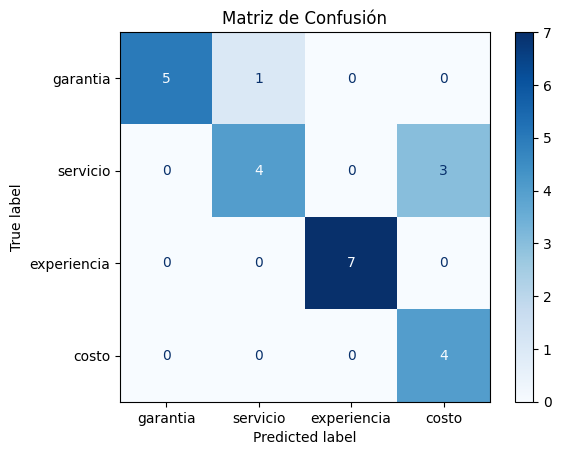

¡Bienvenido al chatbot de nuestra empresa!
Puedes realizar consultas sobre nuestros servicios.
Escribe 'salir' en cualquier momento para terminar la conversación.
Escribe 'agente' para hablar con un agente.
Tú: Cuanto dura la garantia
Chatbot: Le informamos que la garantía dura 12 meses.
Tú: cuanto cuesta el servicio
Chatbot: Nuestro servicio estará operativo en un plazo de 6 meses.
Tú: cuando inicia el servicio
Chatbot: Nuestro servicio estará operativo en un plazo de 6 meses.
Tú: cual es el precio del servicio
Chatbot: El servicio es de 30 euros al mes.
Tú: que experiencia tiene en el mercado?
Chatbot: Contamos con 25 años de experiencia en el mercado.
Tú: agente
Un agente se pondrá en contacto contigo en breve. ¡Gracias!
Tú: adios
Chatbot: Por favor, ¿podría repetir la pregunta?
Tú: salir
¡Gracias por visitarnos! Hasta luego.


In [31]:

import pandas as pd
import numpy as np
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Preguntas por categoría
preguntas_garantia = [
    "¿Cuál es la duración de la garantía para este producto?",
    "¿Qué cobertura ofrece la garantía?",
    "¿Puedo extender la garantía más allá del período estándar?",
    "¿Cuáles son los términos para reclamar la garantía?",
    "¿Hasta qué fecha puedo hacer uso de la garantía?",
    "¿Cómo se activa la garantía para nuevos productos?",
    "¿Qué procedimiento sigo si quiero hacer uso de la garantía?",
    "¿Cuánto tiempo después de la compra es válida la garantía?",
    "¿La garantía cubre daños accidentales?",
    "¿Hay alguna exclusión importante en la garantía?",
    "¿Qué documentos necesito para procesar un reclamo de garantía?",
    "¿Es transferible la garantía si vendo el producto?",
    "¿La garantía incluye soporte técnico?",
    "¿Cuántos meses de garantía ofrece la empresa por defectos de fábrica?",
    "¿Qué pasos debo seguir para validar la garantía?",
    "¿La garantía cubre componentes y accesorios?",
    "¿Se puede renovar la garantía al finalizar el periodo original?",
    "¿Qué tipo de daños están cubiertos por la garantía?",
    "¿Hay una garantía extendida disponible para compra?",
    "¿Quién es responsable de los gastos de envío en caso de reparación por garantía?",
    "¿Cuál es el tiempo estimado de respuesta para un reclamo de garantía?",
    "¿Cómo puedo verificar el estado de mi reclamo de garantía?",
    "¿Existe una política de devolución o reemplazo bajo la garantía?",
    "¿Puedo obtener un reembolso si el producto no puede ser reparado?",
    "¿La garantía aplica internacionalmente?",
    "¿Existen garantías especiales para ciertos componentes del producto?",
    "¿Qué sucede si el producto es reparado por un servicio no autorizado?",
    "¿Cómo afecta la modificación del producto a la garantía?",
    "¿La garantía cubre actualizaciones de software?",
    "¿Cuáles son las limitaciones de la cobertura de garantía?"
]

preguntas_servicio = [
    "¿Cuándo está disponible el servicio al cliente?",
    "¿Cómo puedo programar un servicio para mi producto?",
    "¿Existen servicios de emergencia disponibles?",
    "¿Cuál es el costo del servicio técnico?",
    "¿Dónde puedo encontrar una lista de los servicios ofrecidos?",
    "¿Qué horarios de atención tiene el servicio al cliente?",
    "¿El servicio incluye asistencia en el hogar?",
    "¿Cuánto tiempo tarda la prestación de un servicio típico?",
    "¿Qué opciones de servicio están disponibles para los clientes internacionales?",
    "¿Puedo cancelar o reprogramar un servicio programado?",
    "¿Qué políticas de privacidad aplican durante la prestación del servicio?",
    "¿Se ofrece algún tipo de garantía en los servicios proporcionados?",
    "¿Hay algún descuento disponible para servicios recurrentes?",
    "¿Cómo se manejan las quejas o problemas con un servicio realizado?",
    "¿Qué métodos de pago acepta el servicio?",
    "¿El servicio incluye consultas o diagnósticos gratuitos?",
    "¿Existen paquetes o promociones para múltiples servicios?",
    "¿Cómo puedo acceder al soporte técnico en línea?",
    "¿Hay un número directo para asistencia urgente?",
    "¿Se ofrece soporte multilingüe en el servicio al cliente?",
    "¿Cuáles son los procedimientos para resolver disputas de servicio?",
    "¿Se requiere algún tipo de preparación antes de recibir el servicio?",
    "¿Cómo puedo dar seguimiento a la calidad del servicio recibido?",
    "¿El servicio incluye alguna formación o instrucción para el usuario?",
    "¿Qué protocolos de seguridad se siguen durante la prestación del servicio?",
    "¿Existen restricciones de servicio basadas en la ubicación geográfica?",
    "¿Cómo puedo hacer una reserva de servicio en línea?",
    "¿Qué tan rápido es el tiempo de respuesta del servicio técnico?",
    "¿El servicio ofrece actualizaciones o mejoras para productos antiguos?",
    "¿Cómo puedo proporcionar retroalimentación sobre el servicio recibido?"
]

preguntas_experiencia = [
    "¿Cuántos años de experiencia tiene la empresa en esta industria?",
    "¿Qué experiencia previa tienen sus técnicos?",
    "¿Qué tan experimentado es el equipo de atención al cliente?",
    "¿Qué tipo de capacitación reciben sus empleados?",
    "¿La empresa ha recibido algún reconocimiento o premio en su campo?",
    "¿Qué tan satisfechos están los clientes anteriores con sus servicios?",
    "¿Puede proporcionar ejemplos de proyectos o servicios exitosos realizados?",
    "¿Cómo ha evolucionado la empresa a lo largo de los años?",
    "¿Qué políticas implementa la empresa para asegurar la calidad?",
    "¿Qué medidas toma la empresa para mantenerse actualizada en su sector?",
    "¿Cómo gestiona la empresa las situaciones de crisis o emergencia?",
    "¿Qué estrategias de mejora continua tiene implementadas la empresa?",
    "¿Cómo capacita la empresa a su personal para manejar tecnología avanzada?",
    "¿Qué tan bien está posicionada la empresa frente a sus competidores?",
    "¿Cómo maneja la empresa las quejas y sugerencias de los clientes?",
    "¿Qué procesos utiliza la empresa para asegurar la satisfacción del cliente?",
    "¿Cuál es la filosofía empresarial en cuanto a la atención al cliente?",
    "¿Cómo fomenta la empresa la innovación en sus servicios?",
    "¿Qué tanto enfoca la empresa en el desarrollo sustentable?",
    "¿Cuál ha sido la clave del éxito y la longevidad de la empresa en el mercado?",
    "¿Qué tipo de relaciones mantiene la empresa con sus proveedores y socios?",
    "¿Cómo asegura la empresa la confidencialidad y seguridad de la información del cliente?",
    "¿Cuáles son los principales desafíos que ha enfrentado la empresa y cómo los ha superado?",
    "¿Cuáles son los principales valores que guían la operación de la empresa?",
    "¿Cómo contribuye la empresa a la comunidad local?",
    "¿Qué políticas de diversidad e inclusión promueve la empresa?",
    "¿Cuáles son los objetivos a largo plazo de la empresa?",
    "¿Cómo maneja la empresa los cambios en las regulaciones del mercado?",
    "¿Qué tan adaptable es la empresa a las nuevas tendencias del mercado?",
    "¿Cuál es el impacto de la empresa en el sector en términos de innovación?"
]

preguntas_costo = [
    "¿Cuál es el costo total del producto incluyendo todos los servicios?",
    "¿Existen costos adicionales que debería considerar?",
    "¿Cómo se compara el costo de sus servicios con el de la competencia?",
    "¿Qué factores influyen en el precio final del servicio?",
    "¿Existen opciones de financiamiento o planes de pago disponibles?",
    "¿Qué descuentos o promociones están disponibles actualmente?",
    "¿Cómo se determina el precio de los servicios adicionales?",
    "¿Cuál es el rango de precios para los diferentes niveles de servicio ofrecidos?",
    "¿Hay algún costo por cancelación o modificación del servicio?",
    "¿Cuáles son las políticas de reembolso en caso de insatisfacción con el servicio?",
    "¿Existe algún costo oculto que debería saber?",
    "¿Cómo se calculan los impuestos aplicables al precio del servicio?",
    "¿Qué incluye exactamente el precio que estoy pagando?",
    "¿Existe algún beneficio o descuento por pago anticipado?",
    "¿Cuál es el costo por servicios de emergencia o fuera de horario?",
    "¿Existen tarifas reducidas para ciertos grupos o circunstancias?",
    "¿Cuál es la política de precios para clientes habituales?",
    "¿Cómo afectan las fluctuaciones del mercado al precio de sus servicios?",
    "¿Existen garantías de precio o ajustes de precio post-compra?",
    "¿Qué métodos de pago aceptan y cómo afectan al costo final?",
    "¿Cómo justifican el costo de sus servicios premium?",
    "¿Existen costos de mantenimiento o renovación que deba considerar?",
    "¿Cuál es el costo de la actualización o mejora de servicios existentes?",
    "¿Qué opciones de ahorro ofrece la empresa para presupuestos limitados?",
    "¿Cuál es el impacto de los costos de envío en el precio total?",
    "¿Cómo se determina el precio de los componentes o piezas de repuesto?",
    "¿Cuál es el costo por consultoría o asesoramiento especializado?",
    "¿Existen diferencias de precio según la ubicación o el mercado?",
    "¿Qué estrategias de precios utiliza la empresa para atraer nuevos clientes?",
    "¿Cómo se facturan los servicios adicionales o personalizados?"
]

# Concatenar todas las preguntas y etiquetas correspondientes
preguntas = preguntas_garantia + preguntas_servicio + preguntas_experiencia + preguntas_costo
categorias = (['garantia'] * len(preguntas_garantia) +
              ['servicio'] * len(preguntas_servicio) +
              ['experiencia'] * len(preguntas_experiencia) +
              ['costo'] * len(preguntas_costo))

# Crear DataFrame
df = pd.DataFrame({"Pregunta": preguntas, "Grupo": categorias})
print(df)

# Mapeo de categorías a valores numéricos
etiqueta_grupos = {'garantia': 0, 'servicio': 1, 'experiencia': 2, 'costo': 3}
df['Grupo'] = df['Grupo'].map(etiqueta_grupos)
print (df)



# Configuración del modelo y tokenizador
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
model = BertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=4)

# Clase para el dataset
class PreguntasDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Preparar los datos
X_train, X_test, y_train, y_test = train_test_split(df['Pregunta'], df['Grupo'], test_size=0.2, random_state=42)
train_encodings = tokenizer(X_train.tolist(), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(X_test.tolist(), truncation=True, padding=True, max_length=128)
train_dataset = PreguntasDataset(train_encodings, y_train.tolist())
test_dataset = PreguntasDataset(test_encodings, y_test.tolist())

# Argumentos de entrenamiento
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=30,
    per_device_train_batch_size=16,
    learning_rate=5e-5,
    warmup_steps=100,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="steps",
    eval_steps=50,
    save_strategy="steps",
    save_steps=50
)

# Trainer con métricas
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return {"accuracy": accuracy_score(labels, predictions)}

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

# Entrenar y evaluar el modelo
trainer.train()
results = trainer.evaluate()
print("Resultados de la evaluación:", results)

# Matriz de confusión
prediction_output = trainer.predict(test_dataset)
predictions = prediction_output.predictions
label_ids = prediction_output.label_ids
preds_flat = np.argmax(predictions, axis=-1)
cm = confusion_matrix(label_ids, preds_flat, labels=list(etiqueta_grupos.values()))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(etiqueta_grupos.keys()))
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()

import torch.nn.functional as F

# Respuestas por categoría
respuestas_categorias = {
    'garantia': "Le informamos que la garantía dura 12 meses.",
    'servicio': "Nuestro servicio estará operativo en un plazo de 6 meses.",
    'experiencia': "Contamos con 25 años de experiencia en el mercado.",
    'costo': "El servicio es de 30 euros al mes."
}

# Umbral de confianza
umbral_confianza = 0.95  # Ajusta este valor según lo que consideres adecuado

# Función de predicción modificada para incluir un umbral de confianza
def predict(text):
    model.eval()
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    probabilidades = F.softmax(logits, dim=-1)
    max_prob, predictions = torch.max(probabilidades, dim=-1)
    if max_prob.item() < umbral_confianza:
        return "Por favor, ¿podría repetir la pregunta?"
    categoria_predicha = {v: k for k, v in etiqueta_grupos.items()}[predictions.item()]
    return respuestas_categorias[categoria_predicha]

# Chatbot interactivo modificado
print("¡Bienvenido al chatbot de nuestra empresa!")
print("Puedes realizar consultas sobre nuestros servicios.")
print("Escribe 'salir' en cualquier momento para terminar la conversación.")
print("Escribe 'agente' para hablar con un agente.")

while True:
    entrada = input("Tú: ")
    if entrada.lower() == 'salir':
        print("¡Gracias por visitarnos! Hasta luego.")
        break
    elif entrada.lower() == 'agente':
        print("Un agente se pondrá en contacto contigo en breve. ¡Gracias!")
    else:
        respuesta = predict(entrada)
        print("Chatbot:", respuesta)



In [33]:
!pip install SpeechRecognition
!pip install gTTS
!pip install PyAudio  # Esta es necesaria para utilizar el micrófono en Python


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 1.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for PyAudio (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for PyAudio
Failed to build PyAudio
ERROR: Could not build wheels for PyAudio, which is required to install pyproject.toml-based projects


In [35]:

import pandas as pd
import numpy as np
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Preguntas por categoría
preguntas_garantia = [
    "¿Cuál es la duración de la garantía para este producto?",
    "¿Qué cobertura ofrece la garantía?",
    "¿Puedo extender la garantía más allá del período estándar?",
    "¿Cuáles son los términos para reclamar la garantía?",
    "¿Hasta qué fecha puedo hacer uso de la garantía?",
    "¿Cómo se activa la garantía para nuevos productos?",
    "¿Qué procedimiento sigo si quiero hacer uso de la garantía?",
    "¿Cuánto tiempo después de la compra es válida la garantía?",
    "¿La garantía cubre daños accidentales?",
    "¿Hay alguna exclusión importante en la garantía?",
    "¿Qué documentos necesito para procesar un reclamo de garantía?",
    "¿Es transferible la garantía si vendo el producto?",
    "¿La garantía incluye soporte técnico?",
    "¿Cuántos meses de garantía ofrece la empresa por defectos de fábrica?",
    "¿Qué pasos debo seguir para validar la garantía?",
    "¿La garantía cubre componentes y accesorios?",
    "¿Se puede renovar la garantía al finalizar el periodo original?",
    "¿Qué tipo de daños están cubiertos por la garantía?",
    "¿Hay una garantía extendida disponible para compra?",
    "¿Quién es responsable de los gastos de envío en caso de reparación por garantía?",
    "¿Cuál es el tiempo estimado de respuesta para un reclamo de garantía?",
    "¿Cómo puedo verificar el estado de mi reclamo de garantía?",
    "¿Existe una política de devolución o reemplazo bajo la garantía?",
    "¿Puedo obtener un reembolso si el producto no puede ser reparado?",
    "¿La garantía aplica internacionalmente?",
    "¿Existen garantías especiales para ciertos componentes del producto?",
    "¿Qué sucede si el producto es reparado por un servicio no autorizado?",
    "¿Cómo afecta la modificación del producto a la garantía?",
    "¿La garantía cubre actualizaciones de software?",
    "¿Cuáles son las limitaciones de la cobertura de garantía?"
]

preguntas_servicio = [
    "¿Cuándo está disponible el servicio al cliente?",
    "¿Cómo puedo programar un servicio para mi producto?",
    "¿Existen servicios de emergencia disponibles?",
    "¿Cuál es el costo del servicio técnico?",
    "¿Dónde puedo encontrar una lista de los servicios ofrecidos?",
    "¿Qué horarios de atención tiene el servicio al cliente?",
    "¿El servicio incluye asistencia en el hogar?",
    "¿Cuánto tiempo tarda la prestación de un servicio típico?",
    "¿Qué opciones de servicio están disponibles para los clientes internacionales?",
    "¿Puedo cancelar o reprogramar un servicio programado?",
    "¿Qué políticas de privacidad aplican durante la prestación del servicio?",
    "¿Se ofrece algún tipo de garantía en los servicios proporcionados?",
    "¿Hay algún descuento disponible para servicios recurrentes?",
    "¿Cómo se manejan las quejas o problemas con un servicio realizado?",
    "¿Qué métodos de pago acepta el servicio?",
    "¿El servicio incluye consultas o diagnósticos gratuitos?",
    "¿Existen paquetes o promociones para múltiples servicios?",
    "¿Cómo puedo acceder al soporte técnico en línea?",
    "¿Hay un número directo para asistencia urgente?",
    "¿Se ofrece soporte multilingüe en el servicio al cliente?",
    "¿Cuáles son los procedimientos para resolver disputas de servicio?",
    "¿Se requiere algún tipo de preparación antes de recibir el servicio?",
    "¿Cómo puedo dar seguimiento a la calidad del servicio recibido?",
    "¿El servicio incluye alguna formación o instrucción para el usuario?",
    "¿Qué protocolos de seguridad se siguen durante la prestación del servicio?",
    "¿Existen restricciones de servicio basadas en la ubicación geográfica?",
    "¿Cómo puedo hacer una reserva de servicio en línea?",
    "¿Qué tan rápido es el tiempo de respuesta del servicio técnico?",
    "¿El servicio ofrece actualizaciones o mejoras para productos antiguos?",
    "¿Cómo puedo proporcionar retroalimentación sobre el servicio recibido?"
]

preguntas_experiencia = [
    "¿Cuántos años de experiencia tiene la empresa en esta industria?",
    "¿Qué experiencia previa tienen sus técnicos?",
    "¿Qué tan experimentado es el equipo de atención al cliente?",
    "¿Qué tipo de capacitación reciben sus empleados?",
    "¿La empresa ha recibido algún reconocimiento o premio en su campo?",
    "¿Qué tan satisfechos están los clientes anteriores con sus servicios?",
    "¿Puede proporcionar ejemplos de proyectos o servicios exitosos realizados?",
    "¿Cómo ha evolucionado la empresa a lo largo de los años?",
    "¿Qué políticas implementa la empresa para asegurar la calidad?",
    "¿Qué medidas toma la empresa para mantenerse actualizada en su sector?",
    "¿Cómo gestiona la empresa las situaciones de crisis o emergencia?",
    "¿Qué estrategias de mejora continua tiene implementadas la empresa?",
    "¿Cómo capacita la empresa a su personal para manejar tecnología avanzada?",
    "¿Qué tan bien está posicionada la empresa frente a sus competidores?",
    "¿Cómo maneja la empresa las quejas y sugerencias de los clientes?",
    "¿Qué procesos utiliza la empresa para asegurar la satisfacción del cliente?",
    "¿Cuál es la filosofía empresarial en cuanto a la atención al cliente?",
    "¿Cómo fomenta la empresa la innovación en sus servicios?",
    "¿Qué tanto enfoca la empresa en el desarrollo sustentable?",
    "¿Cuál ha sido la clave del éxito y la longevidad de la empresa en el mercado?",
    "¿Qué tipo de relaciones mantiene la empresa con sus proveedores y socios?",
    "¿Cómo asegura la empresa la confidencialidad y seguridad de la información del cliente?",
    "¿Cuáles son los principales desafíos que ha enfrentado la empresa y cómo los ha superado?",
    "¿Cuáles son los principales valores que guían la operación de la empresa?",
    "¿Cómo contribuye la empresa a la comunidad local?",
    "¿Qué políticas de diversidad e inclusión promueve la empresa?",
    "¿Cuáles son los objetivos a largo plazo de la empresa?",
    "¿Cómo maneja la empresa los cambios en las regulaciones del mercado?",
    "¿Qué tan adaptable es la empresa a las nuevas tendencias del mercado?",
    "¿Cuál es el impacto de la empresa en el sector en términos de innovación?"
]

preguntas_costo = [
    "¿Cuál es el costo total del producto incluyendo todos los servicios?",
    "¿Existen costos adicionales que debería considerar?",
    "¿Cómo se compara el costo de sus servicios con el de la competencia?",
    "¿Qué factores influyen en el precio final del servicio?",
    "¿Existen opciones de financiamiento o planes de pago disponibles?",
    "¿Qué descuentos o promociones están disponibles actualmente?",
    "¿Cómo se determina el precio de los servicios adicionales?",
    "¿Cuál es el rango de precios para los diferentes niveles de servicio ofrecidos?",
    "¿Hay algún costo por cancelación o modificación del servicio?",
    "¿Cuáles son las políticas de reembolso en caso de insatisfacción con el servicio?",
    "¿Existe algún costo oculto que debería saber?",
    "¿Cómo se calculan los impuestos aplicables al precio del servicio?",
    "¿Qué incluye exactamente el precio que estoy pagando?",
    "¿Existe algún beneficio o descuento por pago anticipado?",
    "¿Cuál es el costo por servicios de emergencia o fuera de horario?",
    "¿Existen tarifas reducidas para ciertos grupos o circunstancias?",
    "¿Cuál es la política de precios para clientes habituales?",
    "¿Cómo afectan las fluctuaciones del mercado al precio de sus servicios?",
    "¿Existen garantías de precio o ajustes de precio post-compra?",
    "¿Qué métodos de pago aceptan y cómo afectan al costo final?",
    "¿Cómo justifican el costo de sus servicios premium?",
    "¿Existen costos de mantenimiento o renovación que deba considerar?",
    "¿Cuál es el costo de la actualización o mejora de servicios existentes?",
    "¿Qué opciones de ahorro ofrece la empresa para presupuestos limitados?",
    "¿Cuál es el impacto de los costos de envío en el precio total?",
    "¿Cómo se determina el precio de los componentes o piezas de repuesto?",
    "¿Cuál es el costo por consultoría o asesoramiento especializado?",
    "¿Existen diferencias de precio según la ubicación o el mercado?",
    "¿Qué estrategias de precios utiliza la empresa para atraer nuevos clientes?",
    "¿Cómo se facturan los servicios adicionales o personalizados?"
]

# Concatenar todas las preguntas y etiquetas correspondientes
preguntas = preguntas_garantia + preguntas_servicio + preguntas_experiencia + preguntas_costo
categorias = (['garantia'] * len(preguntas_garantia) +
              ['servicio'] * len(preguntas_servicio) +
              ['experiencia'] * len(preguntas_experiencia) +
              ['costo'] * len(preguntas_costo))

# Crear DataFrame
df = pd.DataFrame({"Pregunta": preguntas, "Grupo": categorias})
print(df)

# Mapeo de categorías a valores numéricos
etiqueta_grupos = {'garantia': 0, 'servicio': 1, 'experiencia': 2, 'costo': 3}
df['Grupo'] = df['Grupo'].map(etiqueta_grupos)
print (df)



# Configuración del modelo y tokenizador
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
model = BertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=4)

# Clase para el dataset
class PreguntasDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Preparar los datos
X_train, X_test, y_train, y_test = train_test_split(df['Pregunta'], df['Grupo'], test_size=0.2, random_state=42)
train_encodings = tokenizer(X_train.tolist(), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(X_test.tolist(), truncation=True, padding=True, max_length=128)
train_dataset = PreguntasDataset(train_encodings, y_train.tolist())
test_dataset = PreguntasDataset(test_encodings, y_test.tolist())

# Argumentos de entrenamiento
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=30,
    per_device_train_batch_size=16,
    learning_rate=5e-5,
    warmup_steps=100,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="steps",
    eval_steps=50,
    save_strategy="steps",
    save_steps=50
)

# Trainer con métricas
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return {"accuracy": accuracy_score(labels, predictions)}

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

# Entrenar y evaluar el modelo
trainer.train()
results = trainer.evaluate()
print("Resultados de la evaluación:", results)

# Matriz de confusión
prediction_output = trainer.predict(test_dataset)
predictions = prediction_output.predictions
label_ids = prediction_output.label_ids
preds_flat = np.argmax(predictions, axis=-1)
cm = confusion_matrix(label_ids, preds_flat, labels=list(etiqueta_grupos.values()))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(etiqueta_grupos.keys()))
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()

import torch.nn.functional as F

# Respuestas por categoría
respuestas_categorias = {
    'garantia': "Le informamos que la garantía dura 12 meses.",
    'servicio': "Nuestro servicio estará operativo en un plazo de 6 meses.",
    'experiencia': "Contamos con 25 años de experiencia en el mercado.",
    'costo': "El servicio es de 30 euros al mes."
}

# Umbral de confianza
umbral_confianza = 0.95  # Ajusta este valor según lo que consideres adecuado

# Función de predicción modificada para incluir un umbral de confianza
def predict(text):
    model.eval()
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    probabilidades = F.softmax(logits, dim=-1)
    max_prob, predictions = torch.max(probabilidades, dim=-1)
    if max_prob.item() < umbral_confianza:
        return "Por favor, ¿podría repetir la pregunta?"
    categoria_predicha = {v: k for k, v in etiqueta_grupos.items()}[predictions.item()]
    return respuestas_categorias[categoria_predicha]

# Función para convertir texto a voz y reproducirlo
def hablar(mensaje):
    print(f"Chatbot: {mensaje}")
    tts = gTTS(text=mensaje, lang='es')
    filename = 'respuesta.mp3'
    tts.save(filename)
    playsound.playsound(filename)
    os.remove(filename)

# Función para activar la escucha cuando se detecta la palabra clave "siri"
def activar_escucha():
    recognizer = sr.Recognizer()
    with sr.Microphone() as source:
        print("Di 'siri' para activar...")
        recognizer.adjust_for_ambient_noise(source)
        audio = recognizer.listen(source)
        try:
            texto = recognizer.recognize_google(audio, language='es-ES').lower()
            print("Escuchado:", texto)
            return texto
        except sr.UnknownValueError:
            print("No se pudo entender el audio")
            return ""
        except sr.RequestError:
            print("Error de servicio")
            return ""

# Interfaz de usuario
print("¡Bienvenido al chatbot de nuestra empresa!")
print("Puedes decir 'siri' en cualquier momento para hacer una consulta.")

while True:
    texto_activacion = activar_escucha()
    if "siri" in texto_activacion:
        print("¿En qué puedo ayudarte?")
        texto_pregunta = activar_escucha()
        if "salir" in texto_pregunta:
            hablar("¡Gracias por utilizar nuestro chatbot! Hasta luego.")
            break
        respuesta = predict(texto_pregunta)
        hablar(respuesta)
    elif "salir" in texto_activacion:
        hablar("¡Gracias por utilizar nuestro chatbot! Hasta luego.")
        break



                                              Pregunta     Grupo
0    ¿Cuál es la duración de la garantía para este ...  garantia
1                   ¿Qué cobertura ofrece la garantía?  garantia
2    ¿Puedo extender la garantía más allá del perío...  garantia
3    ¿Cuáles son los términos para reclamar la gara...  garantia
4     ¿Hasta qué fecha puedo hacer uso de la garantía?  garantia
..                                                 ...       ...
115  ¿Cómo se determina el precio de los componente...     costo
116  ¿Cuál es el costo por consultoría o asesoramie...     costo
117  ¿Existen diferencias de precio según la ubicac...     costo
118  ¿Qué estrategias de precios utiliza la empresa...     costo
119  ¿Cómo se facturan los servicios adicionales o ...     costo

[120 rows x 2 columns]
                                              Pregunta  Grupo
0    ¿Cuál es la duración de la garantía para este ...      0
1                   ¿Qué cobertura ofrece la garantía?      0
2    ¿Pued

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss,Validation Loss


KeyboardInterrupt: 